<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Марьяна! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>



---
    
Для лучшей коммуникации будет лучше если ты будешь оставлять ответные комментарий (cвои комментарии к исправлениям, вопросы), так результат будет лучше.  А чтобы ревьюры их не теряли, лучше их подсвечивать цветом (можешь выбрать свой, а можешь использовать   тот который я предложил ниже). И чтобы не возникло путаницы лучше оставлять указание на номер версии комментария по итерация:  

1 итерация

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат!.</div>


2 итерация

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>
    
    
И лучше подсвечивать свои комментарии цветом, для этого достаточно в ячейку markdown добавить: 

```html
<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>    

```    
    
Хорошая коммуникация залог успеха! )
    
---

# Проект: Обучение с учителем: качество модели

<br>**Краткое описание проекта.**
<br>Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Привлекать новых клиентов стало сложнее: большая часть целевой аудитории уже знает о магазине. Но увеличить прибыль хочется, поэтому нужно что-то придумать, как это сделать с постоянными покупателями.


<br>**Цель проекта:**
<br>Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<br>**Задачи:**
- Выгрузить и предобработать данные.
- Провести исследовательский анализ данных.
- Найти модель лучше всего предсказывающую покупательскую активность.
- Найти критерии разделения клиентов по классам, для персонализации предложений, акций и т.п.

Решать задачи нужно будет в два этапа:
- Разработка модели, которая предскажет вероятность снижения покупательской активности.
- Анализ сегментов покупателей(от 1 сегмента). 

## Шаг 1. Загрузка данных

In [1]:
# Установим коэф. для корреляции ФИ и библиотеку для интерпретации моделей
!pip install phik -q
!pip install shap -q
!pip install scikit-learn==1.1.3 -q

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍-q


 

In [2]:
# Импортируем все необходимые нам библиотеки для работы с файлами и построением графиков
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import phik 
import shap
import statsmodels.api as sm
import re

# Для работы с моделями и их обучением
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                  OneHotEncoder, 
                                  OrdinalEncoder,
                                  MinMaxScaler)
from sklearn.metrics import roc_auc_score, RocCurveDisplay, recall_score, confusion_matrix

#Для проверки мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">


Совет:

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 
 


In [3]:
# Зададим константы
RANDOM_STATE = 42
TEST_SIZE = 0.25


In [4]:
# Выгрузим датафреймы и посмотрим на их содержимое
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")


In [5]:
# Напишем функцию, которая отобразит информацию по датафрейму
def information(df):
        print()
        display(df.sample(3))
        display(df.info())
        print(f'Найдено явных дубликатов - {df.duplicated().sum()}')
        display(df.isna().sum())
        print()


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 нужные операции выделены в  функции






<div class="alert alert-warning">


 Совет:

    
     

- сейчас это не нужно (пока лучше вручную набивать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум при EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво. 
 

In [6]:
# Посмотрим на информацию в датафреймах
information(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1052,216400,Прежний уровень,стандарт,да,5.0,3,1000,0.17,Мелкая бытовая техника и электроника,4,1,4,5
829,216177,Прежний уровень,стандарт,да,3.5,4,666,0.21,Мелкая бытовая техника и электроника,2,2,2,8
159,215507,Снизилась,стандарт,да,3.8,3,871,0.32,Техника для красоты и здоровья,2,4,6,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

Найдено явных дубликатов - 0


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [7]:
information(market_money)

,id,Период,Выручка
254,215432,препредыдущий_месяц,4648.0
957,215667,предыдущий_месяц,5159.0
1686,215910,предыдущий_месяц,5360.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Найдено явных дубликатов - 0


id         0
Период     0
Выручка    0
dtype: int64

In [8]:
information(market_time)

,id,Период,минут
1499,216097,предыдцщий_месяц,15
2522,216609,предыдцщий_месяц,13
1769,216232,предыдцщий_месяц,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Найдено явных дубликатов - 0


id        0
Период    0
минут     0
dtype: int64

In [9]:
information(money)

,id,Прибыль
420,215768,5.61
948,216296,5.42
616,215964,3.67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Найдено явных дубликатов - 0


id         0
Прибыль    0
dtype: int64

Данные выгрузили, они соответствуют описанию, однако названия столбцов, даже если и оставлять на кириллице, то необходимо привести к змеиному регистру. Также видны ошибки в данных, которые могли повлиять на возникновение неявных дубликатов в категориальных данных. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
    
- данные загружены корректно (где  надо были проставлены sep=';', decimal=",")
    

	
- предварительный обзор данных сделан

  

- план дальнейших действий составлен
    
    
  
 




## Шаг 2. Предобработка данных

- Изучив данные, мы увидели отсутствие явных дубликатов и пропусков в данных. Однако надо будет повторно убедиться в отсутствии дубликатов после удаления неявных дубликатов. 
- Типы данных все соответствуют значениям в таблице. 
- Столбцы необходимо переименовать. 

In [10]:
# Проверим на наличие неявных дубликатов в столбцах со строковыми данными. 
def unique_elem(list_of_datas):
    for df in list_of_datas:
        cols_categorical = df.select_dtypes(exclude='number').columns.tolist()
        for col in cols_categorical:
            print('Название столбца -', col)
            print(df[col].unique())
            print()
        

In [11]:
unique_elem([market_file, market_money, market_time, money])

Название столбца - Покупательская активность
['Снизилась' 'Прежний уровень']

Название столбца - Тип сервиса
['премиум' 'стандартт' 'стандарт']

Название столбца - Разрешить сообщать
['да' 'нет']

Название столбца - Популярная_категория
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Название столбца - Период
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

Название столбца - Период
['текущий_месяц' 'предыдцщий_месяц']



In [12]:
# Поправим данные в столбцах
market_file['Тип сервиса'] = market_file['Тип сервиса'].str.replace('стандартт','стандарт', regex=True)
market_time['Период'] = market_time['Период'].str.replace('предыдцщий_месяц','предыдущий_месяц', regex=True)

# Смотрим как сработала замена
unique_elem([market_file, market_money, market_time, money])
    

Название столбца - Покупательская активность
['Снизилась' 'Прежний уровень']

Название столбца - Тип сервиса
['премиум' 'стандарт']

Название столбца - Разрешить сообщать
['да' 'нет']

Название столбца - Популярная_категория
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Название столбца - Период
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

Название столбца - Период
['текущий_месяц' 'предыдущий_месяц']



In [13]:
# Приведем название столбцов к змеиному регистру
market_file.columns = market_file.columns.str.replace(r'([A-Z])', r'_\1').\
str.lower().str.lstrip('_').str.replace(r'\s+', '_')  
market_money.columns = market_money.columns.str.replace(r'([A-Z])', r'_\1').\
str.lower().str.lstrip('_').str.replace(r'\s+', '_') 
market_time.columns = market_time.columns.str.replace(r'([A-Z])', r'_\1').\
str.lower().str.lstrip('_').str.replace(r'\s+', '_') 
money.columns = money.columns.str.replace(r'([A-Z])', r'_\1').\
str.lower().str.lstrip('_').str.replace(r'\s+', '_')

/tmp/ipykernel_996/3677042811.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  market_file.columns = market_file.columns.str.replace(r'([A-Z])', r'_\1').\
/tmp/ipykernel_996/3677042811.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  market_money.columns = market_money.columns.str.replace(r'([A-Z])', r'_\1').\
/tmp/ipykernel_996/3677042811.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  market_time.columns = market_time.columns.str.replace(r'([A-Z])', r'_\1').\
/tmp/ipykernel_996/3677042811.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  money.columns = money.columns.str.replace(r'([A-Z])', r'_\1').\


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 Не стоит разбрасывать импорты библиотек по всему проекту, собираем их в одно место

<div class="alert alert-info">Привет, Марат. Поправила. </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Марьяна


 

In [14]:
market_file.head(3)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


In [15]:
market_money.head(3)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [16]:
market_time.head(3)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10


In [17]:
money.head(3)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


In [18]:
# Проверим на наличие явных дубликатов в датафрейме market_file после исправления значений в столбце
market_file.duplicated().sum()

0

**Краткие выводы по этапу**
- Названия столбцов приведено к единому регистру.
- Обработаны ошибки в написании значений в столбцах, убраны неявные дубликаты. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




 

- помнишь о стилистике отдельный плюс за автоматизированный подход при работе со стилистикой названий столбцов


- здорово что обращено внимание на  скрытые дубликаты    и опечатки 
    
  


<div class="alert alert-warning">

Совет: 



- можно еще поискать опечатку  (кстати повлияют ли они  на работу модели?)
 

## Шаг 3. Исследовательский анализ данных

In [19]:
# Посмотрим на статистики числовых данных датафреймов
list_of_datas = [market_file, market_money, market_time, money]
for df in (list_of_datas):
    display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


### Исследуем market_file

Активность со стороны компании, направленной на клиента:
  - в среднем 4.25 рекламных сообщений за 6 месяцев получает клиент, при этом максимум 6.6 сообщений. 
  - в среднем 4 рекламные рассылки, получали клиенты в текущем месяце, минимально - 3, максимально - 5. Совсем небольшой разброс значений. 
  - в среднем зарегистрированные клиенты находятся на сайте около 1.6 лет, минимально - чуть более 3 месяцев, максимально  - чуть более 3 лет. 

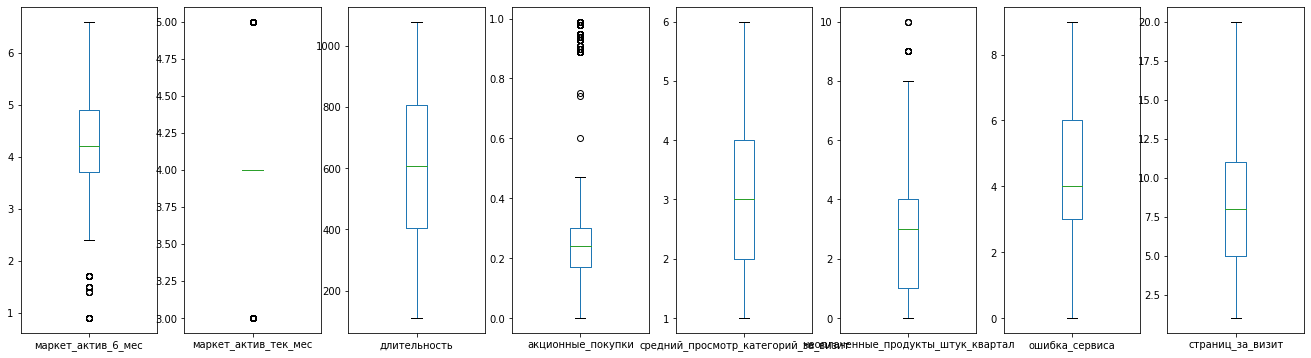

In [20]:
# Посмотрим, есть ли выбросы в данных у количественных показателей.
plot = market_file[market_file.drop('id', axis=1).select_dtypes(include='number').columns.tolist()].\
plot(kind='box', subplots=True, figsize=(23, 6))
plt.show()

1. Мы видим, что низкая маркетинговая активность в рассылке сообщений, это скорее исключение из правил. 
2. Настораживает то, что доля акционных покупок достаточно низкая, это может говорить о том, что акции для постоянных покупателей не всегда интересны, а чаще даже не интересны. 
3. Глубина просмотра категорий от 2 до 4, что не плохо. Люди интересуются разными товарами. 
4. Большая часть клиентов зарегистрирована на сайте от 400 дней до 800 дней. Эти временные отрезки помогли бы классифицировать клиентво, как новых - до 399 дней включительно, от 400 до 800 дней - постоянные покупатели, свыше 800 дней - супер лояльные покупатели.

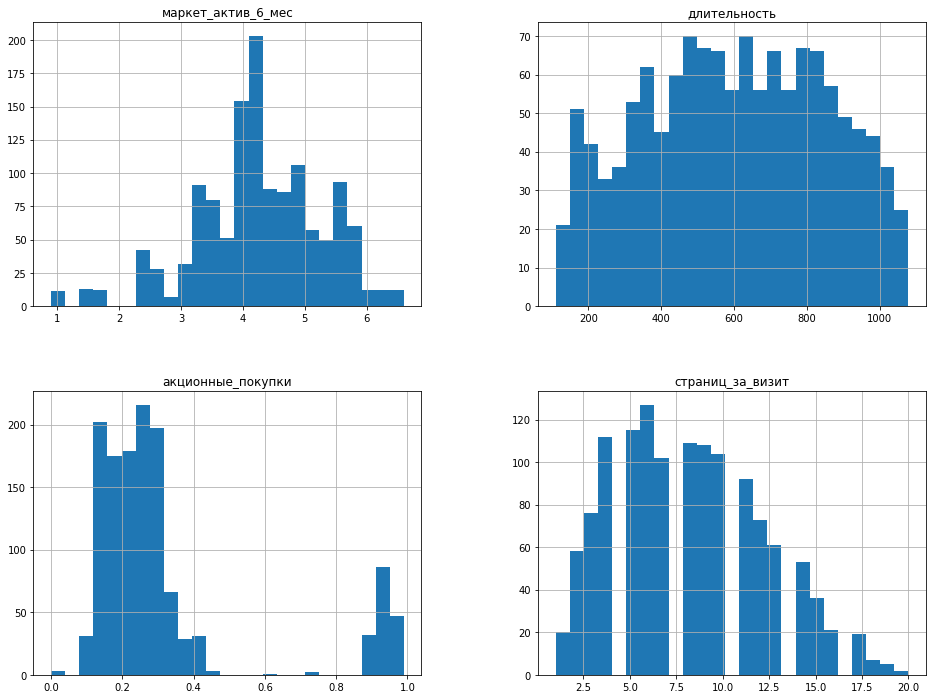

In [21]:
# Построим график по количественным признакам непрерывным
plot2 = market_file[market_file.drop(['id',
                                      'маркет_актив_тек_мес',
                                      'средний_просмотр_категорий_за_визит',
                                      'ошибка_сервиса',
                                      'неоплаченные_продукты_штук_квартал'], axis=1).\
                    select_dtypes(include='number').columns.tolist()].hist(figsize=(16,12), bins=25)
plt.show()

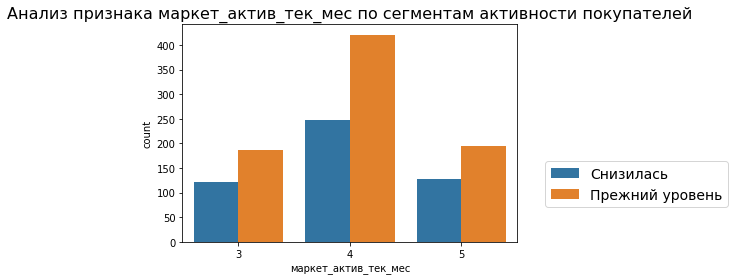

In [22]:
# Посмотрим на дискретные признаки
# Анализ признака 'маркет_актив_тек_мес' по сегментам активности покупателей
sns.countplot(data=market_file, 
              x='маркет_актив_тек_мес', 
              hue='покупательская_активность', 
              saturation=0.75) 
plt.title('Анализ признака маркет_актив_тек_мес по сегментам активности покупателей', fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

Видно из графика, что маркетинговая активность затрагиваеткак активных покупателей так и снизивших свою активность, при этом странно, что большое кол-во снизивших активность получали 4, а не 5 сообщений. Возможно, это происходит из-за недостаточной сегментации покупателей и непонимания, с каким предложением нужно отправлять сообшение.

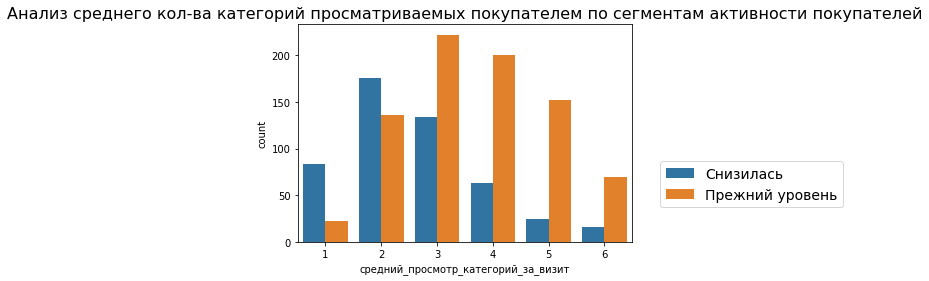

In [23]:
# Посмотрим на дискретные признаки
# Анализ признака 'средний_просмотр_категорий_за_визит' по сегментам активности покупателей
sns.countplot(data=market_file, 
              x='средний_просмотр_категорий_за_визит', 
              hue='покупательская_активность', 
              saturation=0.75) 
plt.title('Анализ среднего кол-ва категорий просматриваемых покупателем по сегментам активности покупателей', \
          fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

Из графика очевидно, что большая часть неактивных покупателей просматривают чаще не более 2 категорий за раз. 

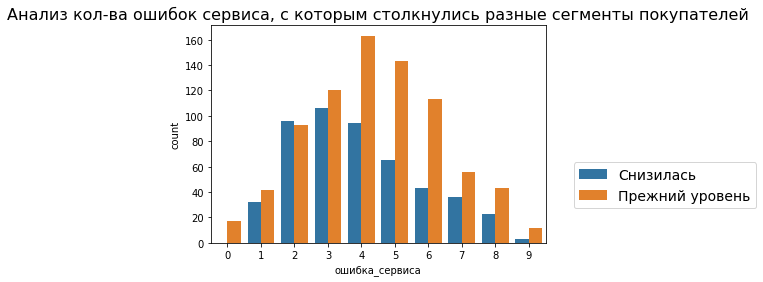

In [24]:
# Посмотрим на дискретные признаки
# Анализ признака 'ошибка_сервиса' по сегментам активности покупателей
sns.countplot(data=market_file, 
              x='ошибка_сервиса', 
              hue='покупательская_активность', 
              saturation=0.75) 
plt.title('Анализ кол-ва ошибок сервиса, с которым столкнулись разные сегменты покупателей', fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

В целом говорить о том, что ошибки сервиса явно повлияли на снижение покупательской активности нельзя, так как активные покупатели в среднем чаще сталкиваются с ошибками. Скорее причина снижения активности в другом.

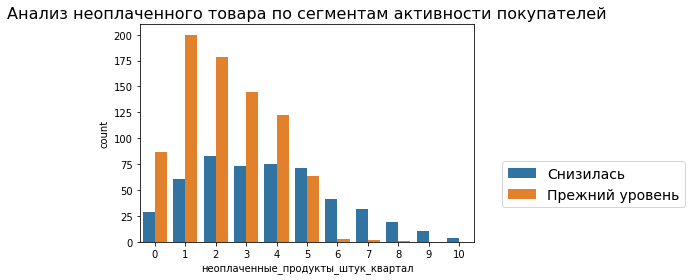

In [25]:
# Посмотрим на дискретные признаки
# Анализ признака 'неоплаченные_продукты_штук_квартал' по сегментам активности покупателей
sns.countplot(data=market_file, 
              x='неоплаченные_продукты_штук_квартал', 
              hue='покупательская_активность', 
              saturation=0.75) 
plt.title('Анализ неоплаченного товара по сегментам активности покупателей', fontsize=16)
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

Видно, что активные покупатели почти никогда не оставляют неоплаченными более 5 товаров, в то время у пассивных покупателей это частая практика.

<div class="alert alert-info">Исправила</div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- некоторые количественные cтолбцы явно носят дискретный характер, а значит не стоит использовать гистограму/boxplot, стоит использовать трафик типа count.  Ведь гистограммы исходят из непрерывности данных, поэтому используют bins, а тут мы должны для каждого уникального значения вывести значение (countplot для каждого уникальные значения   строит свою корзину)
 
    
    
  

<div class="alert alert-warning">


Совет 🤔:

 


- для красоты восприятия рекомендую использовать [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html): один столбец гистограммы, другой boxplot
 
    
- а ещё бы  посоветовал везде использовать библиотеку    [seaborn](https://pythonru.com/biblioteki/seaborn-plot), она строит  симпатичнее и проще matplotlib. Использовать matplotlib это как выучиться на механике, но если умеешь на механике но на автомате (seaborn) точно получится. Есть небольшие отличия в названиях графиках, и фнкциональных возможностях, но это мелочи
     
       
     

Не все числовые непрерывные признаки имеют нормальное распределение но это соответствует природе данных. С точки зрения рассылки рекламы за текущий месяц - то этот признак можно перевести в категориальный. 

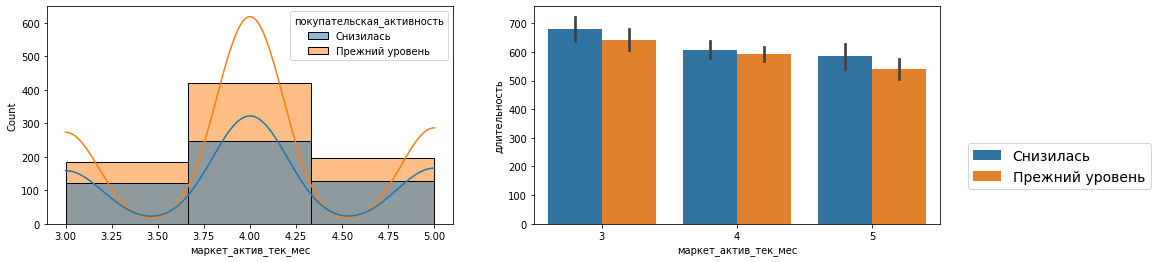

In [26]:
# Посмотрим, как распределяют активность рекламную по покупателям, в зависимости от их даты регистрации
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=market_file, x='маркет_актив_тек_мес' , y='длительность',
              hue='покупательская_активность')
sns.histplot(market_file, bins=3, kde=True, ax=axes[0], \
             hue='покупательская_активность', x='маркет_актив_тек_мес')
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

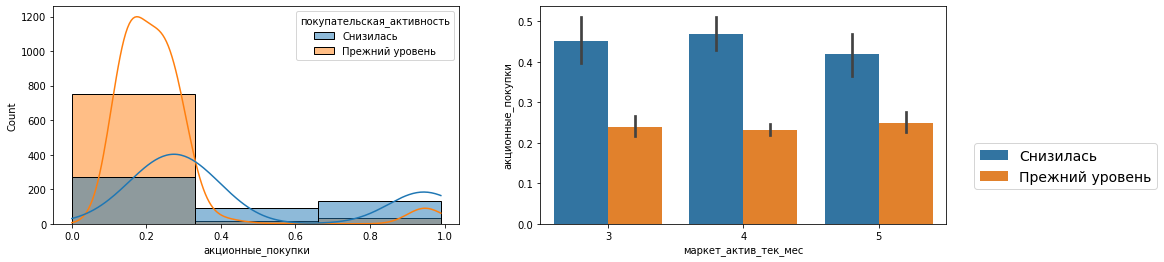

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=market_file, x='маркет_актив_тек_мес' , y='акционные_покупки',
              hue='покупательская_активность')
sns.histplot(market_file, bins=3, kde=True, ax=axes[0], \
             hue='покупательская_активность', x='акционные_покупки')
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

В целом, видно, что чем меньше клиенты на сайте, тем выше шанс получить больше рекламных сообщений, но зависимость явно слабая. Но также видим, что эти сообщения почти не влияют на акционные покупки.

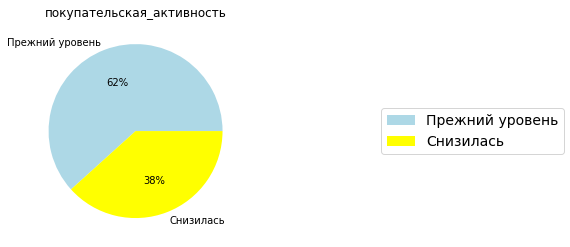

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

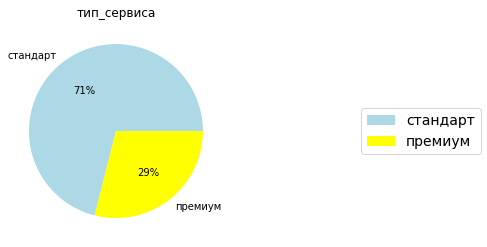

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

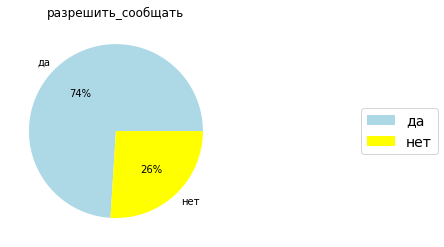

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

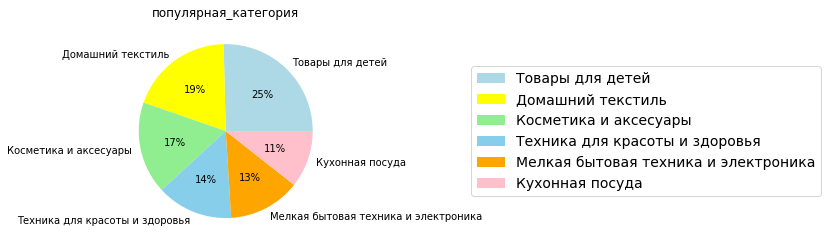

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

In [28]:
# Посмотрим, как распределяются клиенты по категориальным признакам.
def pieplot(df,columns):
    for col in columns:
        values = df[col].value_counts()
        values_names = values.index 
        plt.title(col)
        plt.pie(values, labels=values_names, autopct='%1.0f%%',\
                colors=["lightblue", "yellow", "lightgreen", "skyblue", "orange","pink"])
        plt.legend(loc='center left',bbox_to_anchor=(1.5, 0.5), borderaxespad= 2, fontsize = 14)
        plt.show()
        display(df[col].value_counts())
pieplot(market_file, market_file.drop('id', axis=1).select_dtypes(exclude='number').columns.tolist())

1. У 38% покупателей снизилась покупательская активность.
2. Премиум сервис получают только 29% покупателей.
3. Самая популярная категория товаров среди покупателей - товары для детей(25%).

### Исследуем market_money

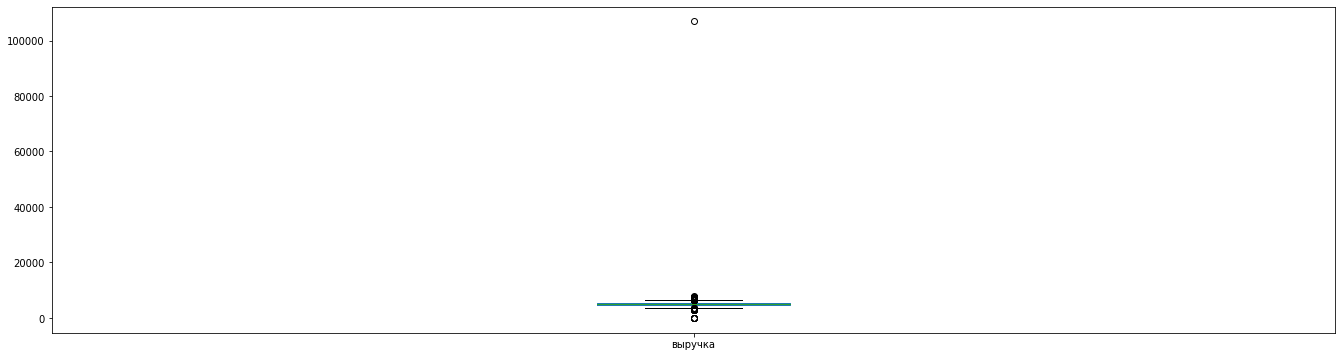

In [29]:
# Посмотрим, есть ли выбросы в данных у количественных показателей.
plot = market_money[market_money.drop('id', axis=1).select_dtypes(include='number').columns.tolist()].\
plot(kind='box', subplots=True, figsize=(23, 6))
plt.show()


Некрасивый выброс мешает визуализации графика, посмотрим на него.

In [30]:
display(market_money.query('выручка>20000'))

,id,период,выручка
98,215380,текущий_месяц,106862.2


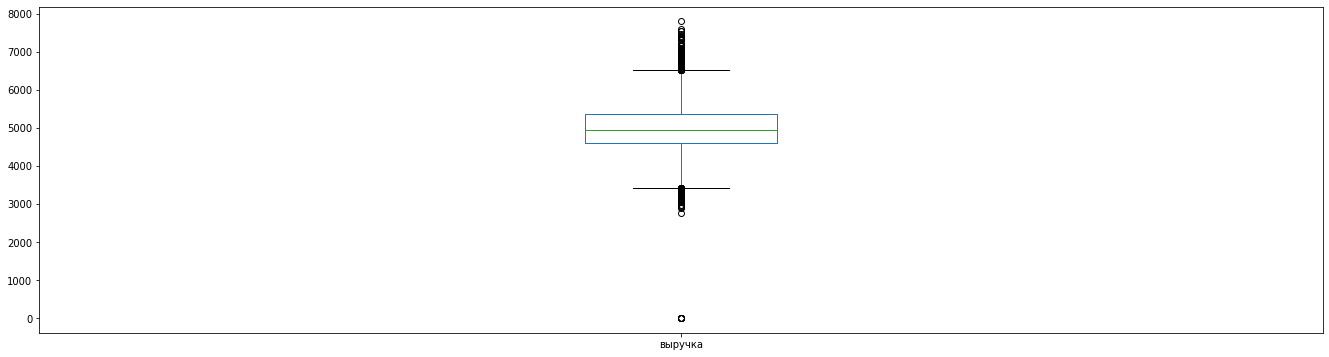

In [31]:
plot = market_money.query('выручка<20000')[market_money.drop('id', axis=1).select_dtypes(include='number').columns.tolist()].\
plot(kind='box', subplots=True, figsize=(23, 6))
plt.show()


In [32]:
market_file.query('id==215380')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Покупатель, которому не нужны оповещения об акции, идентифицируется как премиальный, но его активность снизилась, хотя он и совершил покупку самую большую за последий изучаемый период. Скорее всего будет мешать верно классифицировать клиентов по покупательской активности, так как тут есть несостыковки с точки зрения бытовой логики. Посмотрим нужно ли будет его удалять в дальнейшем. Без этого покупателя картина по выручке выглядит иначе, видим покупателя с нулевой выручкой.

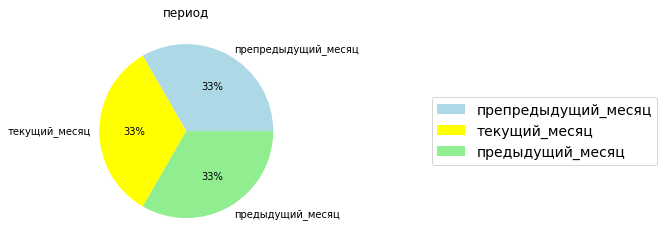

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: период, dtype: int64

In [33]:
pieplot(market_money, market_money.drop('id', axis=1).select_dtypes(exclude='number').columns.tolist())

Данные в market_money представлены в равной степени за три периода, три месяца.

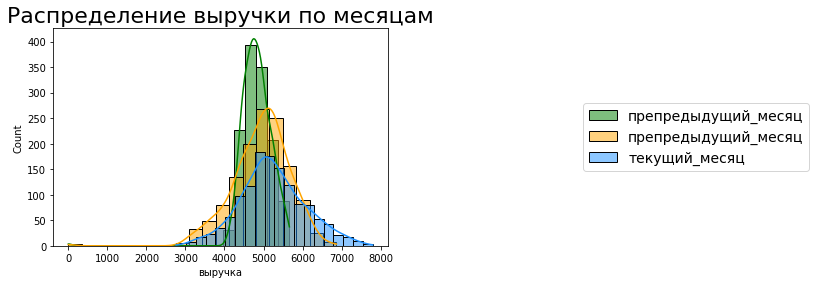

In [34]:
# Посмотрим распределение выручки за три месяца
sns.histplot(market_money.query('id!=215380').loc[market_money['период'] == 'препредыдущий_месяц', 'выручка'],\
             bins=20, kde=True, label='препредыдущий_месяц', color='g')
sns.histplot(market_money.query('id!=215380').loc[market_money['период'] == 'предыдущий_месяц', 'выручка'],\
             bins=20, kde=True, label='препредыдущий_месяц', color='orange')
sns.histplot(market_money.query('id!=215380').loc[market_money['период'] == 'текущий_месяц', 'выручка'],\
             bins=20, kde=True, label='текущий_месяц', color='dodgerblue')
plt.title('Распределение выручки по месяцам', fontsize=22)
plt.legend(loc='center left',bbox_to_anchor=(1.5, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

In [35]:
# Статистики текущего периода по выручке
market_money.loc[market_money['период'] == 'текущий_месяц', 'выручка'].describe()

count      1300.000000
mean       5314.960846
std        2939.708156
min        2758.700000
25%        4706.050000
50%        5179.950000
75%        5761.725000
max      106862.200000
Name: выручка, dtype: float64

In [36]:
# Статистики текущего периода по выручке
market_money.loc[market_money['период'] == 'предыдущий_месяц', 'выручка'].describe()

count    1300.000000
mean     4936.920385
std       739.597997
min         0.000000
25%      4496.750000
50%      5005.000000
75%      5405.625000
max      6869.500000
Name: выручка, dtype: float64

In [37]:
# Статистики текущего периода по выручке
market_money.loc[market_money['период'] == 'препредыдущий_месяц', 'выручка'].describe()

count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: выручка, dtype: float64

Заметно изменение распределения выручки по периодам. Текущий период показывает смещение по выручке вправо, что говорит об изменении структуры выручки к последнему периоду. Скорее всего это вызвано ростом покупательской корзины. Проверим на линейном графике.

<br>Среднее значение выручки выросло на 10 % от первого к третьему периоду.

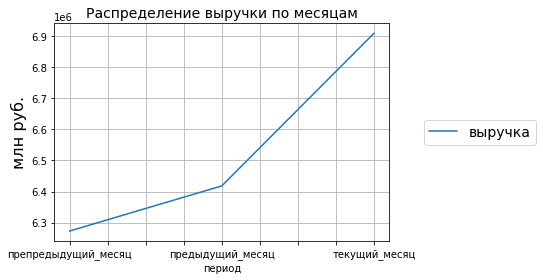

In [38]:
market_money_pivot = pd.pivot_table(market_money, index='период', values='выручка', aggfunc='sum')
market_money_pivot.sort_values(by='выручка', ascending=True).plot(grid=True)
plt.title('Распределение выручки по месяцам', fontsize=14)
plt.ylabel('млн руб.', fontsize = 16)
plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

In [39]:
display(market_money_pivot.sort_values(by='выручка', ascending=True))

,выручка
период,
препредыдущий_месяц,6272769.0
предыдущий_месяц,6417996.5
текущий_месяц,6909449.1


Мы видим, что выручка росла от месяца к месяцу (общий прирост от текущего к препредыдущему периоду составил - 10,14%), это происходило за счет изменения структуры выручки. 

In [40]:
# Удалим выброс с выручкой, найденный на пердыдущем этапе
market_money = market_money.query('выручка<20000')

In [41]:
# Сохраним отдельно id покупателей, чья выручка была не нулевой в каждом из 3 периодов
market_money_pivot_2 = pd.pivot_table(market_money, index='id', columns='период', values='выручка', aggfunc='sum')
market_money_pivot_2 = market_money_pivot_2.\
query('(предыдущий_месяц>0) & (препредыдущий_месяц>0) & (текущий_месяц>0)')
len(market_money_pivot_2)

1296

In [42]:
# Теперь отфильтруем по сохраненным id таблицу market_file
market_file = market_file[market_file['id'].isin(market_money_pivot_2.index)]
len(market_file)

1296

### Исследуем датафрейм market_time 

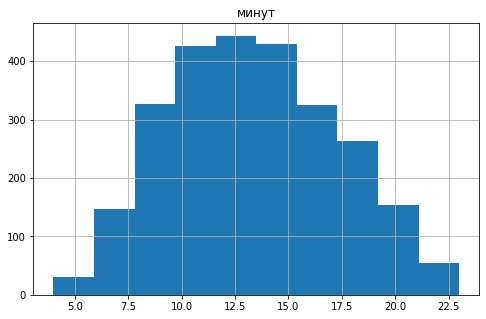

In [43]:
# Посмотрим сколько минут пользователи проводят на сайте
plot3 = market_time[market_time.drop('id', axis=1).select_dtypes(include='number').columns.tolist()].\
hist(figsize=(8,5), bins=10)
plt.show()

Распределение похоже на нормальное.

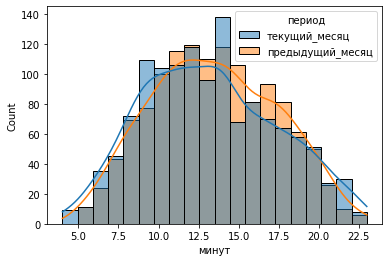

In [44]:
# Посмотрим на распределение в зависимости от периода
sns.histplot(market_time, bins=20, kde=True, hue='период', x='минут')

plt.show()

Можно заметить, что чаще в предыдущем периоде люди тратили от 12 до 14 минут на сайте, а в текущем стали тратить от 10 до 13 минут. С учетом роста выручки сокращение времени на сайте может говорить о том, что клиенты быстрее стали находить то, что им нужно.

### Исследуем датафрейм money 

In [45]:
display(money.head(3))

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


In [46]:
money.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


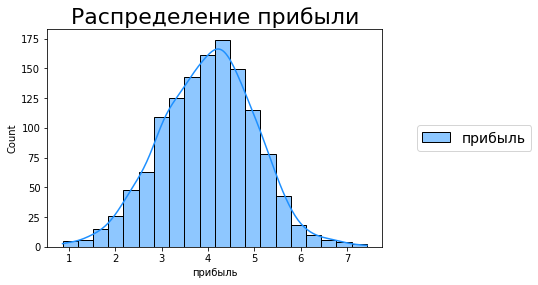

In [47]:
# Посмотрим распределение прибыли 
sns.histplot(money.loc[:,'прибыль'],bins=20, kde=True, label='прибыль', color='dodgerblue')
plt.title('Распределение прибыли', fontsize=22)
plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

У прибыли нормальное распределение, однако скорее всего она дана не в рублях, а в каких-то других единицах. 

**Краткие выводы по этапу**
1. Мы посмотрели распределения числовых признаков в таблицах в отдельности, проанализировали как менялась выручка, прибыль в зависимости от периодов, установили,что не все клиенты были активными покупателями каждый из периодов, установили что за три периода выручка выросла +10% текущий период к препредыдущему. 
2. Мы проверили зависимость снижения покупательской активности в зависимости от рекламной активности маркетинга. Сильной зависимости не было выявлено, хотя умеренная наблюдается. 
3. Было также установлено, что покупатели немного сокращают время пребывания на сайте, об этом говорит смещение гистограммы с минутами пребывания на сайте влево. 
4. Средняя выручка за текущий период(по условию это месяц), составила 5314 ден.ед.. Минимум в отличие от двух предыдущих месяцев отличен от нуля - 2758 ден.ед.. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
    
	
	
- Правильно что продолжаешь практику с прошлого проекта и строишь 2 типа графиков для количественных признаков 
    
 

- Правильно что для минут и выручки построенной графики в разбивке по период 

   
- Здорово что сделал разбивку по таргету, так мы получили дополнительную информацию о наших данных (Это можно было сделать для всех признаков)
    

- Есть выводы по увиденному
 
 
 
 
    

<div class="alert alert-warning">


Совет 🤔:

 
 

- Можно для категориальных   построить [Sunburst-диаграммы](https://habr.com/ru/companies/otus/articles/502568/). Получим   наглядную иллюстрацию иерархических связей

  

## Шаг 4. Объединение таблиц

In [48]:
# Посмотрим на размерность таблиц
print(market_file.shape) 
print(market_time.shape) 
print(market_money.shape)

(1296, 13)
(2600, 3)
(3899, 3)


Нам необходимо в таблицу market_file добавить данные из таблиц market_time и market_money, это будет проще сделать по id. Но нужно подготовить таблицы к объединению, подготовив отдельно для каждого периода столбец. Для этого будем использовать сводные таблицы с разбивкой на периоды. 

In [49]:
display(market_money_pivot_2.head(3))

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4


In [50]:
# Переименуем столбцы
market_money_pivot_2.rename(columns={
    'предыдущий_месяц':'предыдущий_месяц_выручка',
    'препредыдущий_месяц':'препредыдущий_месяц_выручка',
    'текущий_месяц':'текущий_месяц_выручка'
}, inplace=True)
display(market_money_pivot_2.head(3))

период,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4


In [51]:
# Сформируем таблицу market_time с колонками по периодам
market_time_pivot = pd.pivot_table(market_time, 
                                   index='id', 
                                   columns='период', 
                                   values='минут', 
                                   aggfunc='sum')
market_time_pivot.rename(columns={
    'предыдущий_месяц':'предыдущий_месяц_минут',
    'текущий_месяц':'текущий_месяц_минут'
}, inplace=True)
display(market_time_pivot.head(3))

период,предыдущий_месяц_минут,текущий_месяц_минут
id,,
215348,13,14
215349,12,10
215350,8,13


In [52]:
# Посмотрим на размерность таблиц
print(market_file.shape) 
print(market_time_pivot.shape) 
print(market_money_pivot_2.shape)

(1296, 13)
(1300, 2)
(1296, 3)


In [53]:
# Соединим три таблицы в одну
df_full = market_file.merge(market_time_pivot, on='id').merge(market_money_pivot_2, on='id')
display(df_full.sample(3))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,4729.0,5299.0,5353.0
830,216182,Прежний уровень,стандарт,да,6.1,4,395,0.17,Домашний текстиль,4,4,5,10,14,6,5627.0,5045.0,6261.4
1279,216631,Прежний уровень,стандарт,да,3.0,3,455,0.24,Кухонная посуда,5,0,7,7,17,17,4582.0,4735.0,4844.6


In [54]:
information(df_full)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
970,216322,Прежний уровень,премиум,да,5.7,4,918,0.30,Косметика и аксесуары,1,3,5,11,15,17,6165.5,4925.0,7370.6
1272,216624,Прежний уровень,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11,22,19,5565.5,5096.0,6102.4
544,215896,Снизилась,стандарт,нет,4.3,4,460,0.16,Техника для красоты и здоровья,2,1,3,6,13,9,4828.0,4822.0,4952.8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

None

Найдено явных дубликатов - 0


id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
предыдущий_месяц_минут                 0
текущий_месяц_минут                    0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
dtype: int64

**Краткие выводы по этапу**
<br>После объединения таблиц, у нас получился датафрейм на 1297 строк и 18 столбцов. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- данные для моделирования подготовлены верно


 

- 👍 pivot_table отличный инструмент если нужно что-то повернуть (еще можно было использовать set_index + unstack)

 
 

## Шаг 5. Корреляционный анализ

Так как не все признаки в таблице распределены нормально, часть признаков линейно не связаны, а некоторые из них категориальные, то попробуем использовать матрицу корреляции ФИ, которая справляется с такими данными.

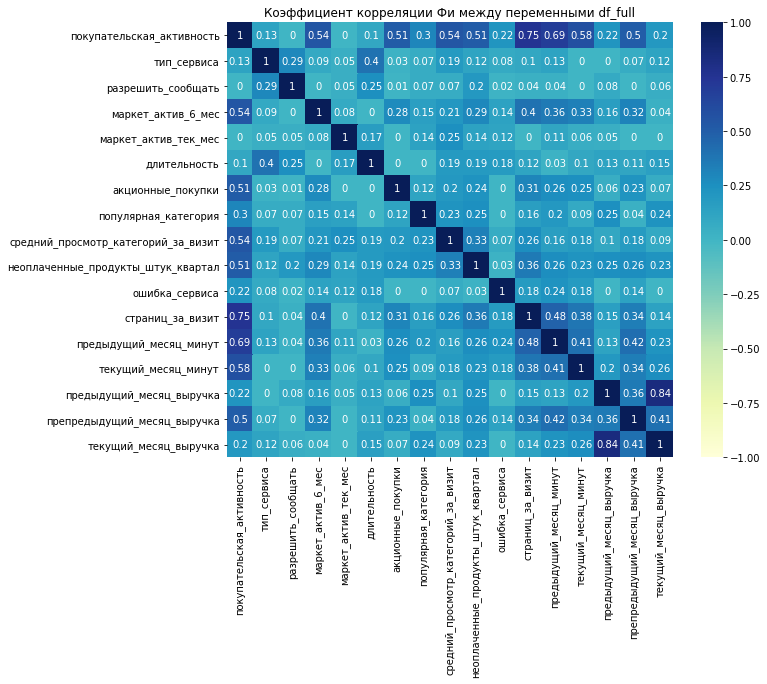

In [55]:
# Вычисляем матрицу корелляций Фи
phi_corr = df_full.drop(['id'], axis=1).phik_matrix(interval_cols=['маркет_актив_6_мес', 
                                                                    'маркет_актив_тек_мес', 
                                                                    'длительность', 
                                                                    'акционные_покупки', 
                                                                    'средний_просмотр_категорий_за_визит', 
                                                                    'неоплаченные_продукты_штук_квартал', 
                                                                    'ошибка_сервиса', 
                                                                    'страниц_за_визит', 
                                                                    'предыдущий_месяц_минут', 
                                                                    'текущий_месяц_минут', 
                                                                    'предыдущий_месяц_выручка', 
                                                                    'препредыдущий_месяц_выручка', 
                                                                    'текущий_месяц_выручка']).round(2)

# Строим тепловую карту Фи
plt.figure(figsize=(10, 8))
sns.heatmap(phi_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("Коэффициент корреляции Фи между переменными df_full")
plt.show()

Из матрицы корреляции видно:
   - Высокая корреляция (>0.65) в группе признаков признаков(покупательская активность - [страниц за визит, предыдущий месяц минут]).
   - Умеренная корреляция (от 0.45 до 0.59) в группе признаков(окупательская активность - [препредыдущий месяц выручка, текущий месяц минут, неоплаченные продукты, средний просмотр категорий за визит, акционные покупки, маркет. активность за 6 месяцев])
   - У остальный признаков низкая корреляция < 0.45
   -  Присутствуют признаки, которые нужно проверить на мультиколлинеарность, их корерляция 0.84 - высокая, это вытучка в двух периодах (текущий и предыдущий)

Стоит отметить, что отдельно прзнаки могут не показывать высокую связь, но при этом признаки могут зависеть от комбинации других признаков. 

In [56]:
# Проверим на мультиколлинеарность признаки через vif значение, если будет больше 10, то это проблема
# добавление константы для перехвата
X = add_constant(df_full)
num_columns = X.select_dtypes(include='number').columns
# расчет VIF для каждого предиктора
def vif_check(df):
    vif_df = pd.DataFrame()
    vif_df['values'] = df.columns
    vif_df['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df
# Проверяем
vif_check(X[num_columns])[1:]

,values,VIF
1,id,1.794333
2,маркет_актив_6_мес,1.240608
3,маркет_актив_тек_мес,1.044579
4,длительность,1.102362
5,акционные_покупки,1.197299
6,средний_просмотр_категорий_за_визит,1.186217
7,неоплаченные_продукты_штук_квартал,1.217164
8,ошибка_сервиса,1.079365
9,страниц_за_визит,1.522282
10,предыдущий_месяц_минут,1.594010


Все признаки < 10, значит мультиколлинеарности нет. 

**Краткий вывод по этапу**
1. Проверка корреляции между признаками указывает навысокую корреляцию признака покупательская_активность с признаками - страниц за визит(0.75) и предыдущий месяц минут(0.69))
2. Умеренная корреляция (от 0.4 до 0.59) признака покупательская_активность с признаками  [препредыдущий месяц выручка, текущий месяц минут, неоплаченные продукты, средний просмотр категорий за визит, акционные покупки, маркет. активность за 6 месяцев]
3. Мультиколлинеарность не выявлена.



 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- здорово что использован phik, это позволяет тебе не обращать внимание на ограничения Пирсона/Спирмена  + указан interval_cols
(Правда не стоило брать столбцы с дискретными значениями)
 
 

- проведен анализ на мультиколлинеарность между переменными  + VIF
 


<div class="alert alert-warning">
 

Совет 🤔:






 

- Можно c помощью scatter_plot сконцентрироваться на связи между выручка текущая - выручка за прошлый. Там явная линейная зависимость, причем как будто бы множество точек тяготеют к двум прямым. Можно поискать факторы которые описывает эти два разных множества. Можно к выручке за прошлый месяц добавить выручку за позапрошлый месяц (или отнять) и тогда в каких то группировках по категориальным признакам будет очень четкая линейная зависимость достигающая по r2 за 0.9. Из этого можно сделать вывод что  в определенных группировках, зависимость между выручками за разные периоды практически дерерминирована (очень высокий показатель r2), то есть из выручки за прошлый (и с учетом позапрошлого месяца) мы можем точно спрогнозировать расходы клиента за текущий месяц. О чем это может говорить? 



- Можно посмотреть scatter_plot между id и акционными покупками/таргетом. Можно кое что интересное увидеть и дать этому обьяснение



- Можно взять разницу между выручками, и нанести их на  scatter_plot, если всё сделать правильно то можно увидеть "крестик" (причем точки на нем будут соответствовать только одному классу в таргете)


Если провести два последних исследования то можно сделать интересный вывод о нашем датасете (тот же вывод можно будет сделать если в качестве признака использовать идентификационный номер клиента и посмотреть на метрику)  

## Шаг 6. Использование пайплайнов


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 
Красный не ставлю (Результат всё равно не изменится), но    labelencoder используем по той же схеме fit_transform на train, transform на test 

Чтобы проверить результат кодирования можно использовать .classes_ 

In [57]:
# Разделим данные для моделирования
X = df_full.drop(['покупательская_активность','id'], axis=1)
y = df_full['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)


<div class="alert alert-info">Поправила тут. </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍Теперь правильно

только где у тебя проверка что как закодировалось? . Нет никакой уверенности что 1 - снизилась, это нужно смотреть

In [58]:
# Закодируем сразу целевой признак 1 - снизилась, 0 - прежний уровень
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [59]:
# Создадим колонки для кодирвоания и масштабирования
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = X_train.select_dtypes(include='number').columns

In [60]:
X_train.shape, X_test.shape

((972, 16), (324, 16))

In [61]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


In [62]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [63]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


In [64]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 8),
        'models__max_features': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines + ColumnTransformer + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования

 

In [65]:
%%time
gs = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

# запускаем поиск гиперпараметров
gs.fit(X_train, y_train) 

print('Лучшая модель и её параметры:\n\n', gs.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', gs.best_score_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> 
Тренируемся, пробовала ставить  verbose = 3 , но выдает простыню кода.</div>  

In [66]:
# Потренировала, но нужн обольше времени чтоб разобраться с этим
display(pd.DataFrame(gs.cv_results_).head(5).sort_values(by='mean_test_score', ascending=False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__max_features,param_preprocessor__num,param_models__n_neighbors,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.013285,0.000361,0.007248,0.000136,DecisionTreeClassifier(random_state=42),2,3,StandardScaler(),NaN,NaN,{'models': DecisionTreeClassifier(random_state...,0.715267,0.637389,0.650000,0.640146,0.642342,0.657029,0.029419,151
4,0.015055,0.003001,0.007768,0.000416,DecisionTreeClassifier(random_state=42),2,3,MinMaxScaler(),NaN,NaN,{'models': DecisionTreeClassifier(random_state...,0.715267,0.637389,0.650000,0.640146,0.642342,0.657029,0.029419,151
0,0.021208,0.015865,0.008619,0.001286,DecisionTreeClassifier(random_state=42),2,2,StandardScaler(),NaN,NaN,{'models': DecisionTreeClassifier(random_state...,0.623576,0.602222,0.564077,0.567511,0.595439,0.590565,0.022282,154
1,0.015228,0.002793,0.008253,0.000828,DecisionTreeClassifier(random_state=42),2,2,MinMaxScaler(),NaN,NaN,{'models': DecisionTreeClassifier(random_state...,0.623576,0.602222,0.564077,0.567511,0.595439,0.590565,0.022282,154
2,0.010480,0.000087,0.006075,0.000178,DecisionTreeClassifier(random_state=42),2,2,passthrough,NaN,NaN,{'models': DecisionTreeClassifier(random_state...,0.623576,0.602222,0.564077,0.567511,0.595439,0.590565,0.022282,154


In [67]:
#randomized_search = RandomizedSearchCV(
    #pipe_final, 
    #param_grid, 
    #cv=5,
    #scoring='roc_auc',
    #n_iter=50,
    #random_state=RANDOM_STATE,
    #n_jobs=-1
#)

In [68]:
#%%time
#randomized_search.fit(X_train, y_train)

#print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
#print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


<div class="alert alert-info"> <b>Комментарии студентаV2:</b> 
Я добавила расчет времени. И поменяла рандомный поиск на поиск по сетке. 

У меня просьба не удалять установку  scikit-learn в начале проекта. Из-за ее удаления, этот шаг не работал, пришлось, чтоб сработал либо менять код в пайплайне, т.к. не давал применить одновременно drop='first', handle_unknown='ignore', либо заново установить scikit-learn, но у меня совсем нет опыта в этих библиотеках и очень тяжело пока дается поиск решений в таких ситуациях. </div>  

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Для некоторых версий нельзя одновременно использовать drop='first', handle_unknown='ignore'.  Один из вариантов решения - это обновить scikit-learn, так что   верно сделала


 

 



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:
 

- Полезно замерить время исполнения кода в самых тяжёлых ячейке, это можно сделать с помощью магической функции %%time или библиотеки time. И тогда коллеге работающие с твоим кодом будут ориентироваться сколько займёт время обучение модели. И стоит ждать или можно попить чайку )
    
           
- Можно разговорить модельку с помощью подачи verbose = 3 (Чтобы отслеживать процессы обучения в режиме онлайн), а чтобы выводилось не только метрика   по которой ты подбираешь гиперпараметры, но целый список из метрик (может  добавить scoring=['Метрика', '', ''...], а через refit   указать по какой метрике подбираются гиперпараметры )     
 
	
 
	
- Перед тем как проводить финальное тестирование, можно заглянуть в  cv_results_, и вытащить полезную информацию.  Например о  лучших метриках на кросс валидации у других моделей, время обучения моделей на лучших гиперпараметрах, время прогнозирования. Неплохо попрактиковаться, ведь нас вполне могут попросить сделать выбор лучшей модели не только по метрике, но и с учётом скорости модели    
        
     
    

    
	Метрика лучшей модели на тренировочной выборке: 0.8963698880698882
	
    
- Это звучит  не очень хорошо с точки зрения теории. Ведь .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок. Может конечно не исправлять,  но хотя бы обрати внимание на логику использования выборок,  и как работает RandomizedSearchCV/GridSearchCV 	
 

In [69]:
# проверим на тестовой выборке
y_test_pred = gs.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_pred), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.92


In [70]:
# проверим на тестовой выборке
#y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
#print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_pred), 2)}')


In [71]:
predict_1 = gs.predict(X_test)
recall = recall_score(y_test, predict_1)
print(recall)

0.8130081300813008


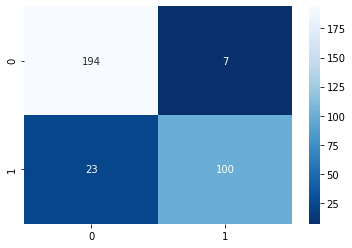

In [72]:
# Построим матрицу ошибок и сохраним её в переменную
cm = confusion_matrix(y_test, predict_1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Колличество ошибок модели небольшое, это хороший знак. Но есть над чем работать:
- FP=7 человек из активных были определены как не активные, в целом, это не очень хорошо, но не критично, они попадут в сегмент, где будут дополнительно изучены их предпочтения, и их лояльность может увеличится от персональных предложений. 
- FN=23 покпателя не активных были определены как активные, это по сути покупатели, которых если мы не найдем, могут уйти и больше не вернуться в наш магазин, а значит это упущенная прибыль.

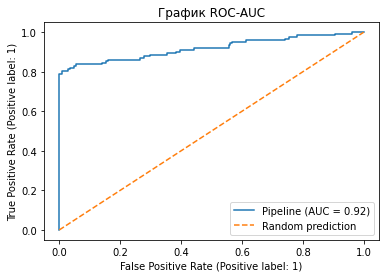

In [73]:
# Построим кривую roc
RocCurveDisplay.from_estimator(gs.best_estimator_, X_test, y_test)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

**Краткие выводы по этапу**
<br>Для поиска модели, которая предсказывает покупателей, у кого снизилась покупательская способность был построен пайплайн с перебором моделей и параметров дял моделей, для наиболее четкого предсказания класса, для покупателя. 

<br>В итоге, после перебора лучшей оказалась модель Логистической регрессии с метрикой ROC-AUC = 0.89 на тренировочных данных и с метрикой качества ROC-AUC = 0.92 на тестовых данных. В целом модели можно доверять, переобучения и недообучения не выявлено. 

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> <b>Исправила.</b> Была выбрана метрика Roc-Auc так как она показывает вариант, при наиболее сбалансированном, оптимальном значении - TPR, она же recall, так как нам важно, не просто верно предсказывать объекты класса 1 = 'снизилась покупательская активность', а не упустить всех кто попадает в этот класс. Но также важно, чтобы TPR и FPR были оптимально сбалансированы, так как слишком большое кол-во активных покупателей отнесенных к не активным может повлечь за собой проблемы, связанные с тем, что акции будут предложены тем, кто совершил бы покупку без скидки, из-за этого могут просесть показатели выручки. Roc-Auc также не чувствительна к тому, что объем значений в классах не сбалансирован, это ещё один плюс к выбору в данном случае данной метрики, так как редко встречается, что покупателей активных и пассивных поровну.</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 (А ещё это Метрика не чувствительна к порогу)


 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:






Ну что ж, Метрика подсчитана верно, осталось только    обосновать  выбор метрики  (тут можно либо подчеркнуть преимущества выбранной метрики, либо увязать с бизнес-постановкой задачи. С точки зрения бизнеса какая Метрика на твой взгляд важнее  recall или precision на классе "снизилась"?)  



<div class="alert alert-warning">
 

Совет:

 


- вопросик: указав scoring='roc_auc', чего мы добиваемся? И будет ли по-разному обучаться модель, если мы укажем другую метрику в  scoring?

 


<div class="alert alert-info"> <b>Комментарии студентаV2:</b>Теоретически на обучение модели не повлияет, а вот на оценку уже обученной модели да, так как скоринг в моем понимании приоритизирует какой метрикой будет оценено качество модели. </div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно, сам процесс обучения никак не меняется


 

## Шаг 7. Анализ важности признаков

In [74]:
# Построим диаграмму shap для оценки вклада признаков модели
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(gs.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)


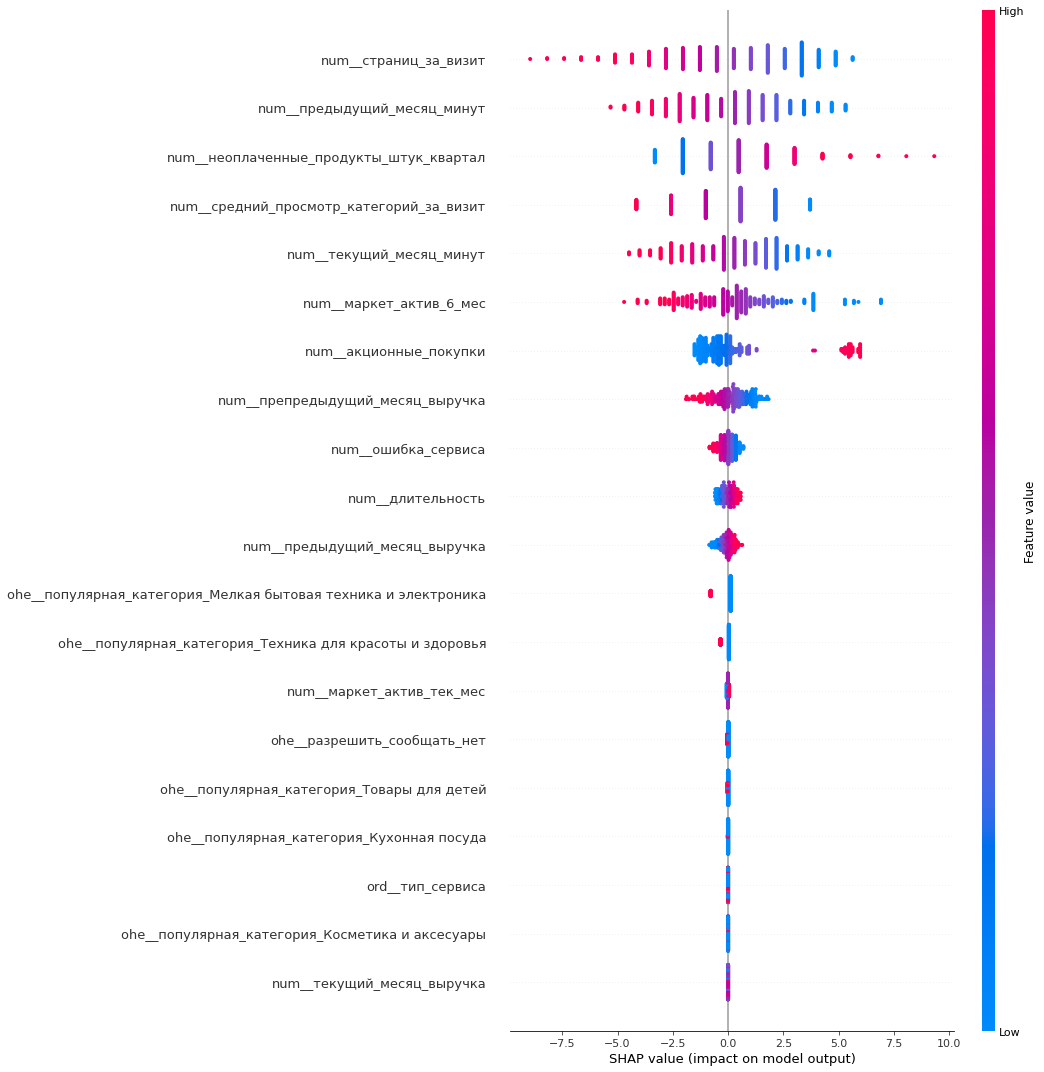

In [75]:
# Зададим парамметры графика
shap.summary_plot(
    shap_values, 
    X_test_2, 
    plot_type="dot", 
    max_display=30, 
    plot_size=(15, 15)  
)

plt.show()

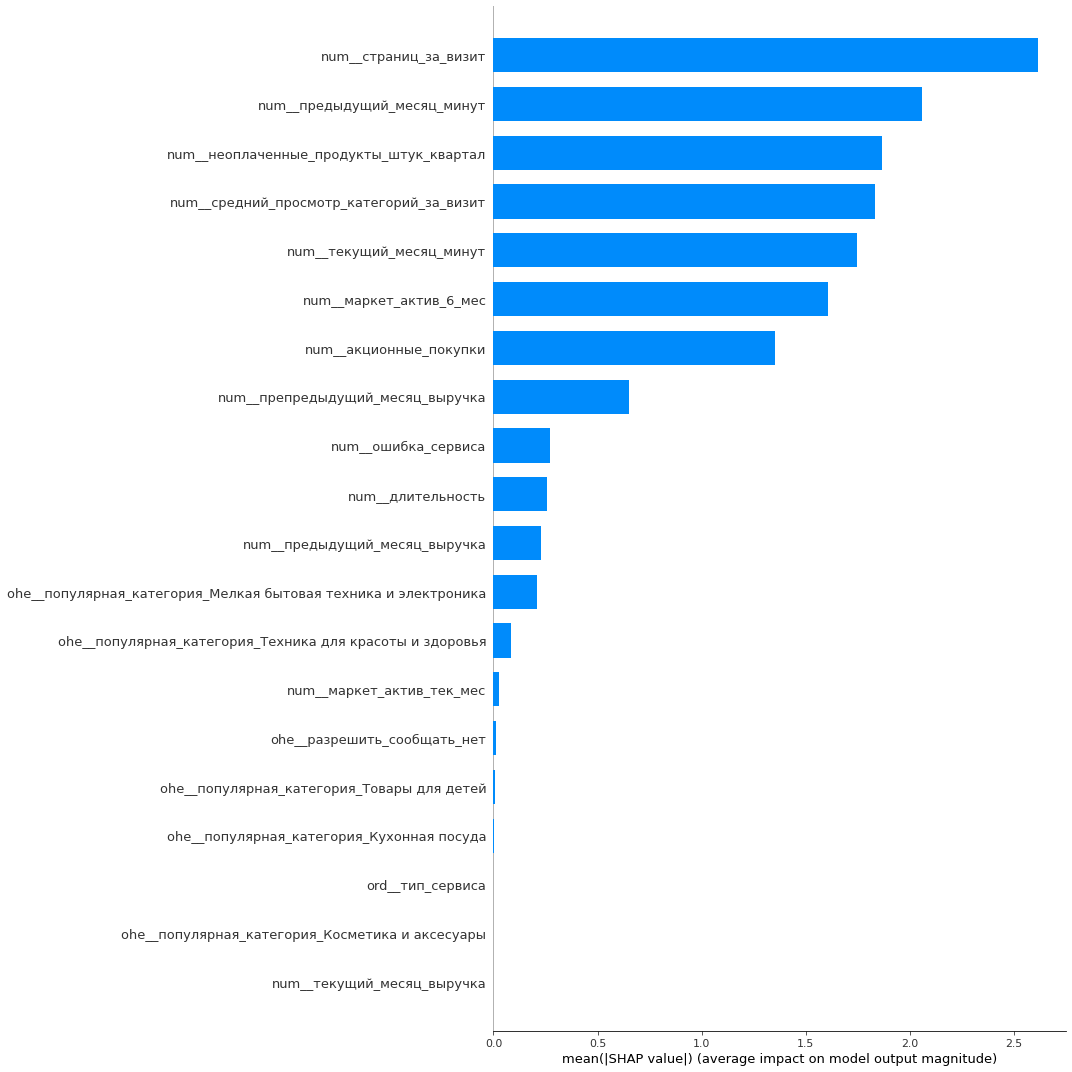

In [76]:
# Посмотрим на признаки п остепени важности 
shap.summary_plot(shap_values, X_test_2, plot_type="bar", max_display=30, plot_size=(15, 15))
plt.show()

**Краткие выводы по этапу**
<br>При оценке веса вклада признаков в модель, при определении снижения покупательской активности, были выявлены следующие закономерности:
<br>Наиболее весомые параметры для определения того, что активность снижается являются:
- кол-во просмотренных страниц за визит, 
- сколько минут потратил покупатель в предыдущем месяце,
- среднее кол-во просмотренных категорий за визит,
- наличие неоплаченных продуктов,

<br>Наименее весомые:
- тип сервиса,
- разрешение на рассылку,
- признак наличия маркетинговой активности в текущем месяце,
- просмотр популярных товарных категорий.

<br>**Из графика визуализации вклада признаков** видно, что есть риски снижения покупательской активности, по следующим признакам, на них стоит обращать пристальное внимание:
- рост неоплаченных продуктов, 
- низкий показатель выручки за предыдущий месяц, 
- человек уже много длительное время зарегистрирован на сайте,
- выручка два месяца назад и в текущем месяце низкая,
- глубина просмотра страниц малая, 
- в прошлом месяце мало тратил на визит на сайт.

<br>Напротив же на повышение покупательской активности указывают следующие значения признаков:
- два месяца назад была дорогая закупка и/или в текущем месяце тоже,
- в текущем месяце тратит много времени на сайте,
- получает много рекламных сообщений,
- просматривает больше среднего категорий за визит, 
- глубина просмотров по страницам растет,
- время на сайте в прошлом месяце повышено. 


  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
    
	
- плюс за использование .beeswarm,  ведь он даёт гораздо больше информации    
    
     
    
<div class="alert alert-warning">


Совет 🤔:
   
 
А что скажешь по поводу акционных продаж?  



<div class="alert alert-info"> <b>Комментарии студентаV1:</b> В целом видна зависимость, не активные покупатели чаще покупают по акции. Это относительно логично, так как из-за их низкой активности, их стараются привлечь, и в основном они проявляют активность, реагируя на подсвеченное лучшее предложение.</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Тут стоило написать так:
    
    
    По мнению модели если доля покупок по акции высокая, то вероятность снижения активности выше
    

## Шаг 8. Сегментация покупателей

### Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Для того, чтобы выявить сегменты, нужно посмотреть как прибыль и ключевые признаки связаны между собой.  Объединим данные таблицы money, c признаками из общего датафрейма, и колонкой с вероятностью отнесения покупателя к классу 1 - снижение покупательской способности.
    

In [77]:
# Добавим в таблицу вероятности предсказания снижения покупательской активности
df_full['вероятность_снижения'] = gs.best_estimator_.predict_proba(X)[:,1]

# Оставим признаки сильно влияющие на работу модели
col_drop = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать']

# Так как у нас есть выручка за 3 периода посчитаем общую выручку, чтобы потом смотреть на зависимости выручки и прибыли
df_full = df_full.drop(col_drop, axis=1)
df_full['общая_выручка'] = df_full['препредыдущий_месяц_выручка'] + \
df_full['текущий_месяц_выручка'] + df_full['предыдущий_месяц_выручка']

display(df_full.sample(5))

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,вероятность_снижения,общая_выручка
1248,216600,4.4,4,349,0.40,Домашний текстиль,5,4,0,8,17,17,4748.0,4625.0,4510.1,0.190657,13883.1
740,216092,4.3,5,1035,0.25,Мелкая бытовая техника и электроника,5,2,7,5,17,20,5194.0,4678.0,5771.2,0.046123,15643.2
1294,216646,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,4923.0,4725.0,5224.6,0.164514,14872.6
384,215736,5.6,3,540,0.36,Косметика и аксесуары,2,4,2,8,8,11,5049.0,4734.0,5168.6,0.748080,14951.6
1048,216400,5.0,3,1000,0.17,Мелкая бытовая техника и электроника,4,1,4,5,15,21,4956.0,4974.0,5070.4,0.037304,15000.4


In [78]:
# Добавим данные о прибыли в датафрейм
df_full = df_full.merge(money, on='id')
display(df_full.sample(5))

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,вероятность_снижения,общая_выручка,прибыль
52,215404,2.4,3,699,0.94,Домашний текстиль,4,1,2,3,12,13,3788.0,4449.0,4867.0,0.897330,13104.0,3.38
494,215846,5.7,4,169,0.14,Техника для красоты и здоровья,2,1,4,12,17,14,5419.0,4956.0,5147.3,0.042970,15522.3,3.51
1090,216442,3.8,4,907,0.13,Косметика и аксесуары,2,1,8,4,13,20,3829.0,4837.0,3085.4,0.311499,11751.4,5.10
432,215784,3.4,4,207,0.30,Домашний текстиль,6,5,4,14,21,14,4165.0,4903.0,3655.4,0.044359,12723.4,3.84
158,215510,3.8,4,324,0.22,Техника для красоты и здоровья,2,7,2,2,9,14,4244.0,4814.0,4242.7,0.894792,13300.7,5.01


In [79]:
# Создадим сегменты по результатам моделирования.
def segmentation(df):
    prog_rate = df['вероятность_снижения']
    if prog_rate <= 0.4:
        return 'активные покупатели'
    elif prog_rate > 0.4 and prog_rate <= 0.55:
        return 'покупатели в зоне риска'
    else:
        return 'низкая активность'

df_full['сегментация_1'] = df_full.apply(segmentation, axis=1)
display(df_full.sample(5))

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,вероятность_снижения,общая_выручка,прибыль,сегментация_1
678,216030,3.3,4,475,0.26,Мелкая бытовая техника и электроника,3,1,5,7,15,14,4914.0,5298.0,4711.2,0.123267,14923.2,4.77,активные покупатели
1148,216500,3.9,5,296,0.24,Косметика и аксесуары,4,4,3,11,17,16,4396.0,4483.0,4450.6,0.160123,13329.6,4.15,активные покупатели
132,215484,2.9,5,448,0.23,Товары для детей,4,2,6,3,5,7,5059.0,4267.0,5018.7,0.888760,14344.7,5.64,низкая активность
260,215612,4.4,3,255,0.94,Домашний текстиль,3,5,7,7,8,12,5848.5,4410.0,6687.0,0.938102,16945.5,4.43,низкая активность
342,215694,5.5,5,982,0.94,Мелкая бытовая техника и электроника,3,1,8,10,18,19,5118.5,5204.0,5174.4,0.083526,15496.9,2.41,активные покупатели


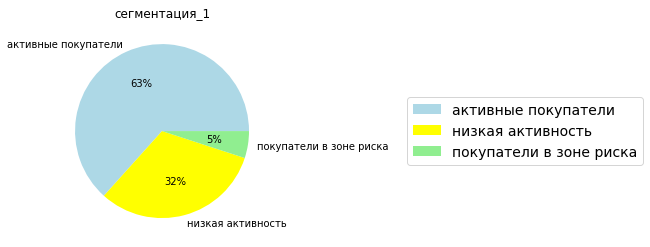

активные покупатели        821
низкая активность          410
покупатели в зоне риска     65
Name: сегментация_1, dtype: int64

In [80]:
# Посмотрим как распределились покупатели по сегментам
pieplot(df_full,['сегментация_1'])


<br>Мы разделили покупателей на сегменты, в зависимости от срепени вероятности снизить свою покупательскую активность, рассчитанной на выбранной ранее модели.
<br>Получилось сформировать три сегмента:
1. Активные покупатели - 63%.
2. Покупатели в зоне риска - 5%.
3. Низкая активность - 32%.

### Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 

**Рассмотрим, сегменты**

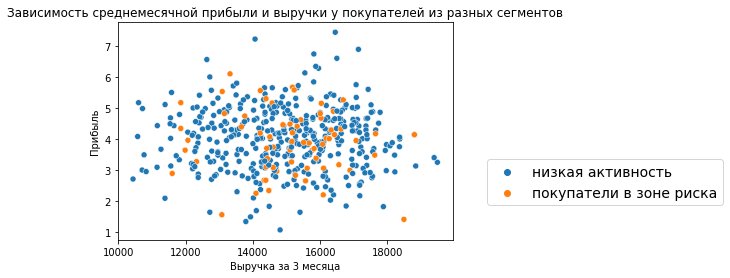

In [81]:
# Зависимость прибыли от сегмента
sns.scatterplot(data=df_full.query('сегментация_1!="активные покупатели"'), \
                y='прибыль', x='общая_выручка', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Выручка за 3 месяца')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и выручки у покупателей из разных сегментов')
plt.show()

Явной линейной зависимости  прибыли от выручки не наблюдается.

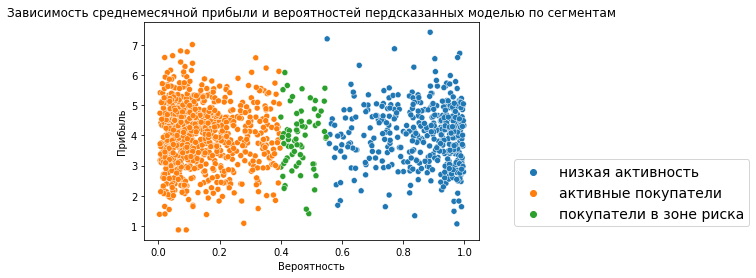

In [82]:
# Зависимость прибыли от вероятности снизить свою покупательскую активность
sns.scatterplot(data=df_full, \
                y='прибыль', x='вероятность_снижения', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Вероятность')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и вероятностей пердсказанных моделью по сегментам')
plt.show()

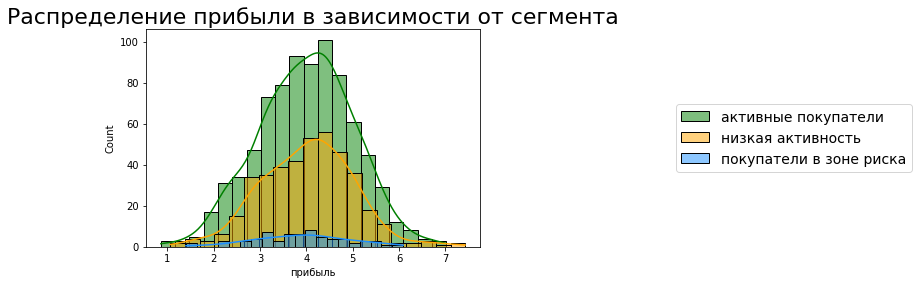

In [83]:
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'активные покупатели', 'прибыль'],\
             bins=20, kde=True, label='активные покупатели', color='g')
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'низкая активность', 'прибыль'],\
             bins=20, kde=True, label='низкая активность', color='orange')
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'покупатели в зоне риска', 'прибыль'],\
             bins=20, kde=True, label='покупатели в зоне риска', color='dodgerblue')
plt.title('Распределение прибыли в зависимости от сегмента', fontsize=22)
plt.legend(loc='center left',bbox_to_anchor=(1.5, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

На графиках видно, что прибыль в разных сегментах принимает схожие значения, единственное что можно сказать о покупателях с низкой активностью, диаппазон значнеий наиболее часто встречающихся в сегменте прибыли немного уже, чем у активных

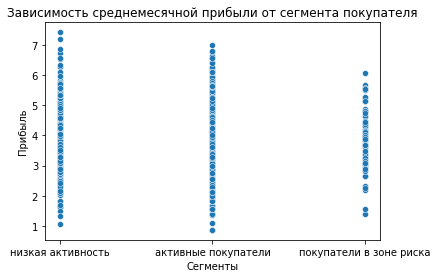

In [84]:
sns.scatterplot(data=df_full, y='прибыль', x='сегментация_1')
plt.xlabel('Сегменты')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли от сегмента покупателя')
plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Scatterplot предназначен для визуализации взаимосвязи между двумя непрерывными переменными. Когда одна из переменных категориальная величина или дискретная (а то и обе), мы видим мнлжество точек которые трудно интерпретировать (не считать же их вручную). Тем более эти точки могут перекрывать друг друга. 
    
Поэтому если один из признаков количественный, а другой категориальный,  то лучше построить boxplot по количественному признаку в разбивке по категориальному.  
    
Либо можно построить Barplot  - и мы увидем   cредние значения  количество признаков в разбивке по категориальному. Также можно использовать violinplot, swarmplot, можно даже попробовать построить гистограммы в разбивке по категориальному    

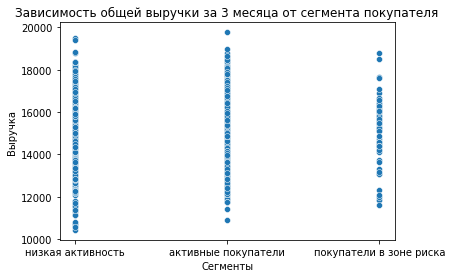

In [85]:
sns.scatterplot(data=df_full, y='общая_выручка', x='сегментация_1')
plt.xlabel('Сегменты')
plt.ylabel('Выручка')
plt.title('Зависимость общей выручки за 3 месяца от сегмента покупателя')
plt.show()

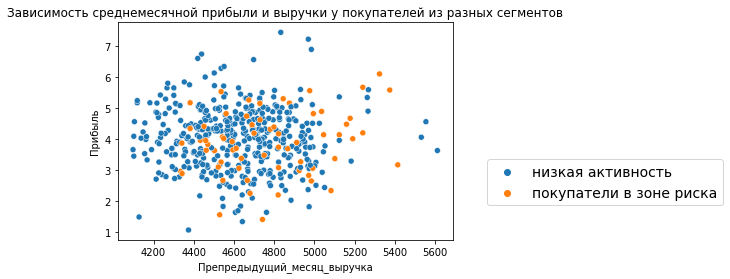

In [86]:
sns.scatterplot(data=df_full.query('сегментация_1!="активные покупатели"'), \
                y='прибыль', x='препредыдущий_месяц_выручка', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Препредыдущий_месяц_выручка')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и выручки у покупателей из разных сегментов')
plt.show()

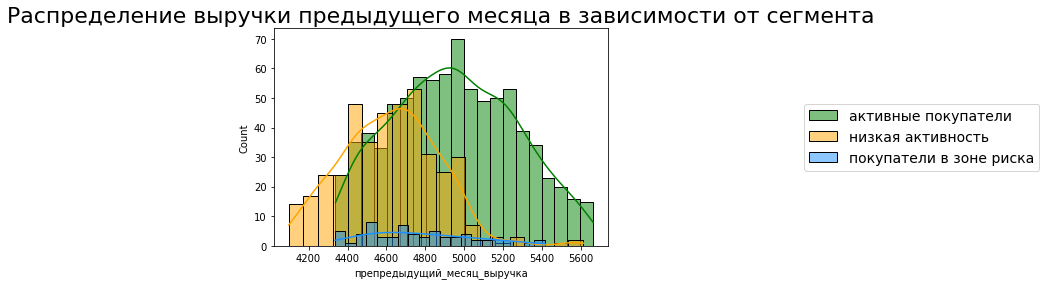

In [87]:
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'активные покупатели', 'препредыдущий_месяц_выручка'],\
             bins=20, kde=True, label='активные покупатели', color='g')
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'низкая активность', 'препредыдущий_месяц_выручка'],\
             bins=20, kde=True, label='низкая активность', color='orange')
sns.histplot(df_full.loc[df_full['сегментация_1'] == 'покупатели в зоне риска', 'препредыдущий_месяц_выручка'],\
             bins=20, kde=True, label='покупатели в зоне риска', color='dodgerblue')
plt.title('Распределение выручки предыдущего месяца в зависимости от сегмента', fontsize=22)
plt.legend(loc='center left',bbox_to_anchor=(1.5, 0.5), borderaxespad= 2, fontsize = 14)
plt.show()

Очень хорошим признаком для выявления активности покупателя можно считать выручку предшествующего месяца, структура выручки сильно разная, можно точно говорить о том, что у покупателей с низкой активностью и у покупателей из зоны риска снижения активности значения выручкив предшествующем текущему месяце были значительно ниже, чем у активных покупателей, эти показатели можно сравнивать, для выявления сегмента, с которым нужно работать, над увеличением активности. 

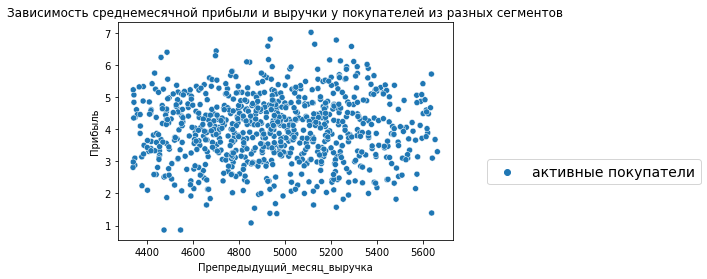

In [88]:
sns.scatterplot(data=df_full.query('сегментация_1=="активные покупатели"'), \
                y='прибыль', x='препредыдущий_месяц_выручка', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Препредыдущий_месяц_выручка')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и выручки у покупателей из разных сегментов')
plt.show()

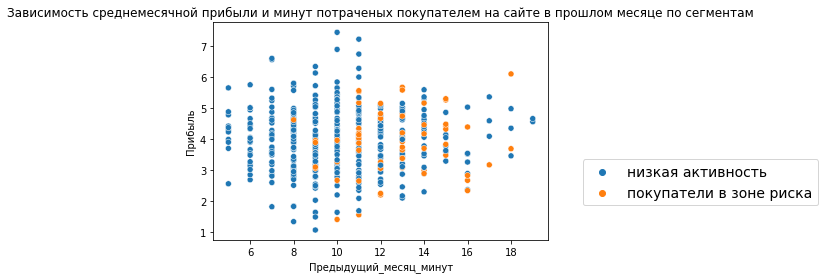

In [89]:
sns.scatterplot(data=df_full.query('сегментация_1!="активные покупатели"'), \
                y='прибыль', x='предыдущий_месяц_минут', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Предыдущий_месяц_минут')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и минут потраченых покупателем на сайте в прошлом месяце по сегментам')
plt.show()

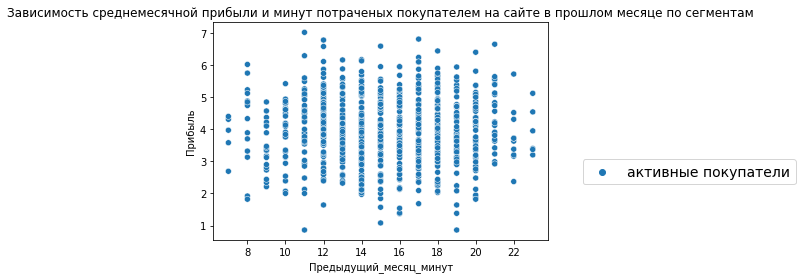

In [90]:
sns.scatterplot(data=df_full.query('сегментация_1=="активные покупатели"'), \
                y='прибыль', x='предыдущий_месяц_минут', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Предыдущий_месяц_минут')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и минут потраченых покупателем на сайте в прошлом месяце по сегментам')
plt.show()

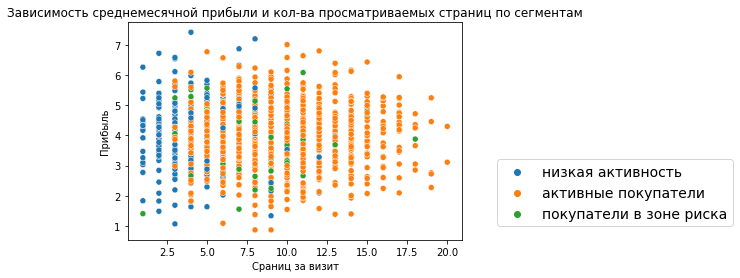

In [91]:
sns.scatterplot(data=df_full, \
                y='прибыль', x='страниц_за_визит', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Сраниц за визит')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и кол-ва просматриваемых страниц по сегментам')
plt.show()

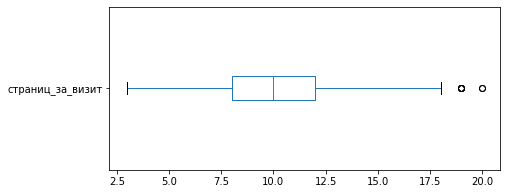

In [92]:
df_full.query('сегментация_1=="активные покупатели"')['страниц_за_визит'].plot(kind='box', \
                                                                               figsize=(7, 3), vert=False)
plt.show()

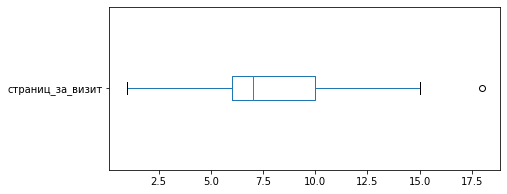

In [93]:
df_full.query('сегментация_1=="покупатели в зоне риска"')['страниц_за_визит'].plot(kind='box', \
                                                                               figsize=(7, 3), vert=False)
plt.show()

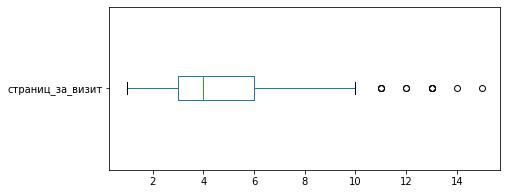

In [94]:
df_full.query('сегментация_1=="низкая активность"')['страниц_за_визит'].plot(kind='box', \
                                                                               figsize=(7, 3), vert=False)
plt.show()

Покупателей, которые просматривают менее 8 страниц за визит стоит относить к покупателям  в зоне риска по снижению активности, если покупатели стали просматривать менее 6 страниц, то они сильно снизили активность - и это знак, что пока их заинтересовать персональным предложением.

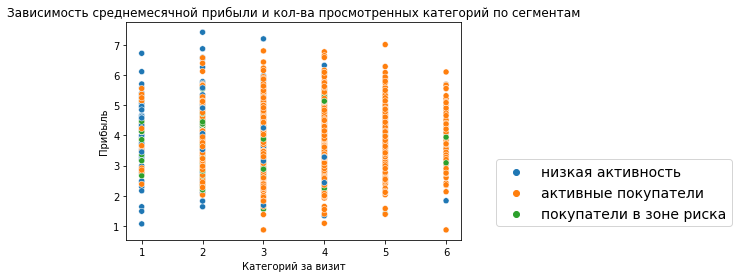

In [95]:
sns.scatterplot(data=df_full, \
                y='прибыль', x='средний_просмотр_категорий_за_визит', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Категорий за визит')
plt.ylabel('Прибыль')
plt.title('Зависимость среднемесячной прибыли и кол-ва просмотренных категорий по сегментам')
plt.show()

Явной зависимости от среднего кол-ва просмотренных категорий с прибылью не выявлено.

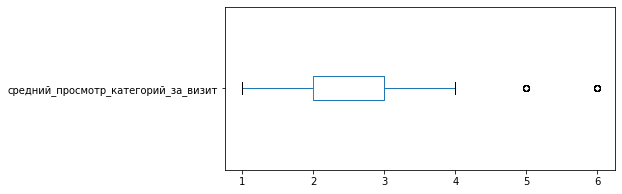

In [96]:
df_full.query('сегментация_1=="низкая активность"')['средний_просмотр_категорий_за_визит'].plot(kind='box', \
                                                                               figsize=(7, 3), vert=False)
plt.show()

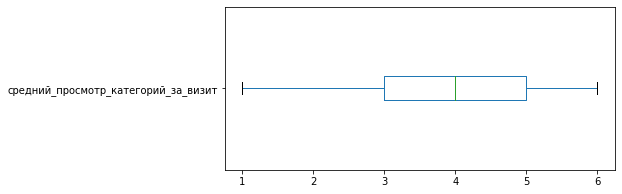

In [97]:
df_full.query('сегментация_1=="активные покупатели"')['средний_просмотр_категорий_за_визит'].plot(kind='box', \
                                                                               figsize=(7, 3), vert=False)
plt.show()

Однако можно заметить, что покупатели с низкой активностью, просматривают в среднем от 2 до 3 категорий, а активные от 3 до 5. Если показывать покупатели товары, которые могли бы его заинтересовать, то возможно, грубина просмотра повышалась бы.

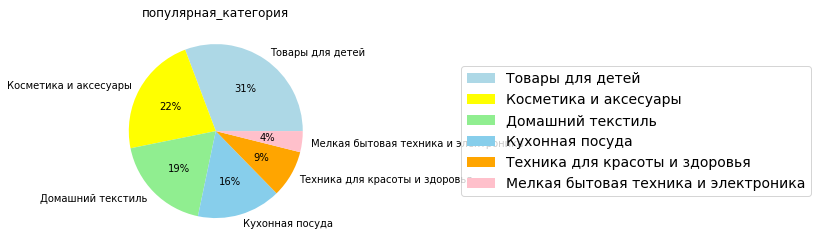

Товары для детей                        126
Косметика и аксесуары                    92
Домашний текстиль                        76
Кухонная посуда                          64
Техника для красоты и здоровья           36
Мелкая бытовая техника и электроника     16
Name: популярная_категория, dtype: int64

In [98]:
# Посмотрим какие категории популярны среди покупателей с низкой активностью и с высокой
pieplot(df_full.query('сегментация_1=="низкая активность"'),['популярная_категория'])

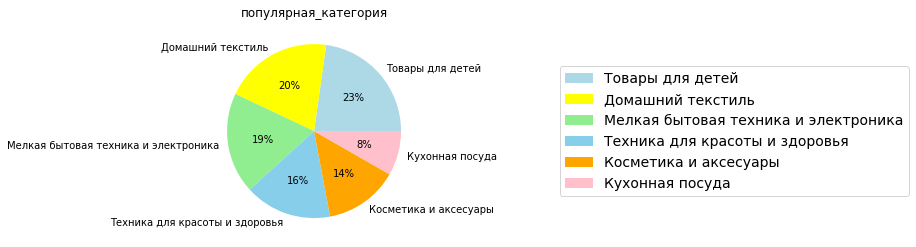

Товары для детей                        187
Домашний текстиль                       166
Мелкая бытовая техника и электроника    154
Техника для красоты и здоровья          133
Косметика и аксесуары                   113
Кухонная посуда                          68
Name: популярная_категория, dtype: int64

In [99]:
pieplot(df_full.query('сегментация_1=="активные покупатели"'),['популярная_категория'])

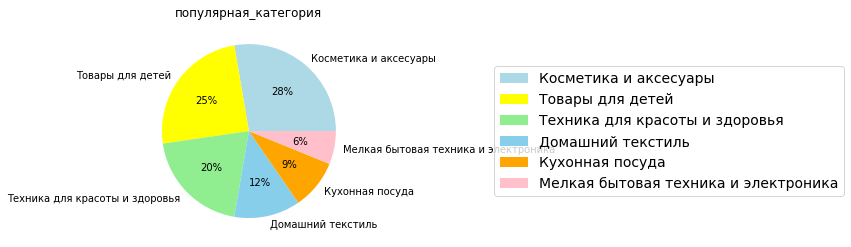

Косметика и аксесуары                   18
Товары для детей                        16
Техника для красоты и здоровья          13
Домашний текстиль                        8
Кухонная посуда                          6
Мелкая бытовая техника и электроника     4
Name: популярная_категория, dtype: int64

In [100]:
# Посмотрим какие категории популярны среди покупателей в зоне риска
pieplot(df_full.query('сегментация_1=="покупатели в зоне риска"'),['популярная_категория'])

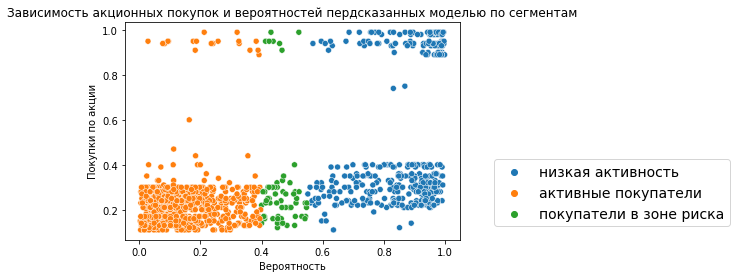

In [101]:
# Зависимость покупок по акции от вероятности снизить свою покупательскую активность
sns.scatterplot(data=df_full, \
                y='акционные_покупки', x='вероятность_снижения', hue='сегментация_1')
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 0.5), borderaxespad= 2, fontsize = 14)
plt.xlabel('Вероятность')
plt.ylabel('Покупки по акции')
plt.title('Зависимость акционных покупок и вероятностей пердсказанных моделью по сегментам')
plt.show()

Не сильно, но заметно, что неактивные покупатели чаще свершают покупки по акции чем активные. Возможно для них есть стоп факторы покупки, а акция эти стоп факторы нивелирует, но не переводит покупателей в разряд активных. 

### Сделайте выводы о сегментах:

<br>Для анализа был выбран сегмент покупателей с низкой активностью на сайте. 
<br>Второй сегмент, который также нам интересен с точки зрения снижения риска потери клиентов и снижения их активности - сегмент покупателей в зоне риска.
<br>Данные по общей выручке за три периода и прибыли не сильно зависят от друг друга, и одинаково близкие значения встречаются достаточно часто в каждом из сегментов. Возможно если увеличить период наблюдений и расширить выборку, эта зависимость станет более заметной, а также возможно поможет введение новых признаков, таких на средняя стоимость корзины, указание единиц, в которых присутствуют данные в таблице. 

<br>У неактивных клиентов выявлен ряд паттернов поведения, на которые можно влиять в случае их выявления, а также паттерны, которые необходимо принять к сведению, чтобы быть готовыми предложить что-то персональное:
1. Низкие показатели по выручке за месяц до текущего периода. Было выявлено, что среднее значение данного показателя примерно на 8% ниже среднего показателя активных покупателей (примерно 4600 против 5000). 
2. Если покупатель проводит на сайте менее 10 минут, то это тоже показатель низкой активности. Чтобы увеличить время нахождения покупателя на сайте, заинтересовать его, можно предлагать сопутсвующие товары, либо посмотреть хиты и акции, темболее,что покупателям с низкой активностью акции интересны. 
3. Если покупатель просматривает менее 6 страниц за визит, то он врядли дойдет до покупки. По сути 6 страниц сейчас - это путь от главной страницы то одного конкретного тавара, через каталог и фильтры, возможно если покупатель просматривает мало страниц, ему сложно найти то, что он ищет и он быстро уходит. Нужно протестировать разные виды поиска товара на сайте, и предлагать похожие товары, это даст возможность сравнивать товары с одним и тем же применением и разной ценой, так покупатель будет сильнее вовлечен в процесс покупки. 
4. Для того чтобы увлечь покупателей с низкой активностью, необходимо анализировать какие категории они чаще всего смотрели, и давать персональные предложения именно в них. Из графиков стало очевидным то, что в имеющемся датафрейме, активные покупатели больше интересовались товарами для детей(23%) и домашним текстилем(20%), но не все они популярны у покупателей с низкой активностью, им нужны предложения по категориям - товары для детей(31%) и косметика и аксесуары(23%). А вот покупателей в зоне риска интересует тема косметики, красоты и здоровья, поэтому им лучше делать персональные предложения в соответсвии с их предпочтениями.


 <div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Данный раздел студент сам выбирает как проводить,  главное чтобы была логика и рассуждения.  С этим всё в порядке


 

<div class="alert alert-warning">


Совет 🤔:

 

- Можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров). Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное

  

<div class="alert alert-info"> <b>Комментарии студентаV1:</b>Данный комментарий проработала ниже.</div>

In [102]:
market_money_full = market_money.merge(df_full, on='id')
print(market_money_full['период'].unique().tolist())

['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


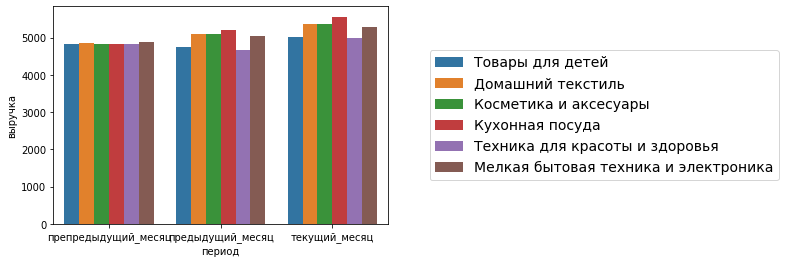

In [103]:
sns.barplot(
    x="период", 
    y="выручка", 
    hue="популярная_категория", 
    order=["препредыдущий_месяц", 'предыдущий_месяц', 'текущий_месяц'], 
    ci=None,
    data=market_money_full
);
plt.legend(loc='center left',bbox_to_anchor=(1.04, 0.5), borderaxespad= 2, fontsize = 14)

Видны три стабильно растущих категории:
1. Домашний текстиль
2. Косметика и аксессуары
3. Кухонная посуда

<br>Посмотрим на эту динамику по сегментам, так можно выявить какой сегмент способствовал росту.

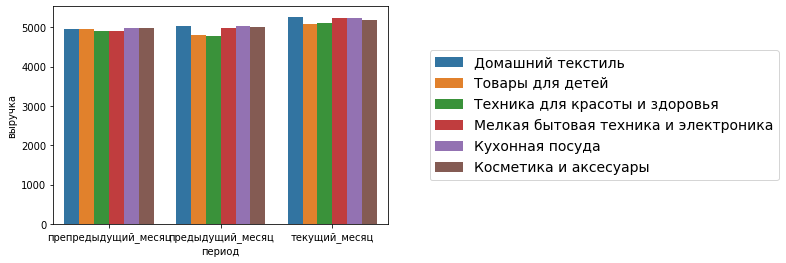

In [104]:
sns.barplot(
    x="период", 
    y="выручка", 
    hue="популярная_категория", 
    order=["препредыдущий_месяц", 'предыдущий_месяц', 'текущий_месяц'], 
    ci=None,
    data=market_money_full.query('сегментация_1=="активные покупатели"')
);
plt.legend(loc='center left',bbox_to_anchor=(1.04, 0.5), borderaxespad= 2, fontsize = 14)

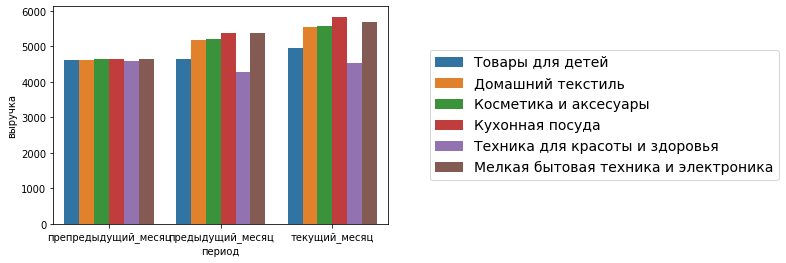

In [105]:
sns.barplot(
    x="период", 
    y="выручка", 
    hue="популярная_категория", 
    order=["препредыдущий_месяц", 'предыдущий_месяц', 'текущий_месяц'], 
    ci=None,
    data=market_money_full.query('сегментация_1=="низкая активность"')
);
plt.legend(loc='center left',bbox_to_anchor=(1.04, 0.5), borderaxespad= 2, fontsize = 14)

Выявлены некоторые закономерности в данных:
- И все три категории растут стабильно как раз у не активных покупателей. 
  - Домашний текстиль.
  - Косметика и аксессуары.
  - Кухонная посуда.
  - + у них также растут стабильно показатели выручки по товарам для детей и мелкой бытовой технике.
- Выручка по домашнему текстилю растет у активных покупателей тоже в динамике. 

**О чем может говорить данная динамика в сегменте.**
Так как исследуется постоянный сегмент на протяжении трех месяцев, при прочих равных он не изменился, но выручка выросла, это может значить что покупатели увеличивают стоимость своей корзины в среднем, что в целом не плохой показатель. Поэтому нет смысла заставлять их увеличивать стоимость корзины, она органично растет. Скорее нужны акции на частоту захода на сайт, на частотность покупок товаров без акций, а для этого нужно предлагать утп в интересных им категориях, нужно подсвечивать преимущества товаров вовремя и адресно. 

<br>**Возвращаясь к динамике выручки по категориям.** Эти же 4 категории были выявлены, как самые популярные среди покупателей с низкой активностью, что ещё раз свидетельствует о том, что персонализировать предложения в целом можно наиболее популярным категорим в сегменте.
Хотя чтобы не терять покупателей вообще, стоило бы разделить сегмент неактивных на подсегменты. И в зависимости от наиболее часто просматриваемой категории и делать персональное предложение именно в ней и смежных.
Например, если покупатель интересуется домашним текстилей, то он возможно заинтересуется и куходдной посудой и т.п.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Здорово что попробовала не только метод сравнения, но анализ в динамике


 

## Общий вывод


Вспомним задачу, которая была поставлена в начале проекта:
<br>"Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность."


**Для решения поставленной задачи были осуществлены следующие этапы.**

<br>*Предобработка данных.*
- Данные были предобработаны от дубликатов, неточностей в написании значений в столбцах, названия столбцов приведены к змеиному регистру.
- Была проведена проверка типов данных и пропусков, все в данных было корректно.

<br>*Исследование данных помогло выявить особенности признаков.*
- Был выявлен и удален выброс с аномально большим значением выручки(id215380)
- Среднее значение выручки выросло на 10 % от первого к третьему периоду. Структура выручки поменялась, разброс значений выручки увеличился. В целом динамика по выручке положительная.
- Выявлена умеренная зависимость снижения покупательской активности из-за снижения маркетинговой активности на последние пол года.
- Было также установлено, что покупатели немного сокращают время пребывания на сайте, об этом говорит смещение гистограммы с минутами пребывания на сайте влево.

<br>*Были выявлены признаки, которые лучше всего подходят для использования их в модели.*
- Провели корреляционный анализ, который помог выбрать лучшие признаки для модели:
   - Высокая корреляция (>0.65) в группе признаков признаков(покупательская активность - [страниц за визит, предыдущий месяц минут]).
   - Умеренная корреляция (от 0.45 до 0.59) в группе признаков(окупательская активность - [препредыдущий месяц выручка, текущий месяц минут, неоплаченные продукты, средний просмотр категорий за визит, акционные покупки, маркет. активность за 6 месяцев])
<br>Однако, учитывая, что иногда на качество модели влияют не каждый признак по отдельности, а их комбинация, было решено использовать их максимально возможное количество. 


<br>*Для предсказания класса среди постоянных клиентов, кого относить к тем, у кого активность высокая, а кого к тем, у кого низкая, были составлены pipeline.*
- В пайплайн итооговый включён перебор  следующих моделей предсказания  KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). 
- У каждой модели отдельно были заданы гипер параметры, с перебором ряда параметров в диаппазонах заданных в ручную. Поэтому стоит учитывать, что при изменении диапазонов ограничивающих значения гиперпараметров, выбор наилучшей модели может измениться. 
- Для подбора наилучшего варианта модели был использован RandomizedSearchCV, как оптимальный с точки зрения скорости поиска лучшего решения.

<br> Лучше всего себя показала модель - LogisticRegression, со следующими парамметрами:C=3, penalty='l1', random_state=42, solver='liblinear'.

<br> Точность модели была проверена с помощью метрики Roc Auc, так как нам было важно безошибочно предсказывать класс - 1 (пользователей снизивших свою покупательскую активность), при этом нужна была метрика не зависящая от дисбаланса классов. В итоге, были получены метрики на тренировочной и тестовой выборке:
- Метрика лучшей модели на тренировочной выборке - 0.89
- Метрика лучшей модели на тестовой выборке - 0.92
<br>Что говорит, о том, что модели можно доверять, переобучения и недообучения не выявлено.


<br>Признаки, которые использованы в модели были проверены на предмет важности и весомости в модели с помощью shap графиков. Наиболее важными признаками оказались - кол-во просмотренных страниц за визит,
сколько минут потратил покупатель в предыдущем месяце, среднее кол-во просмотренных категорий за визит,
наличие неоплаченных продуктов.

<br>Благодаря модели мы получили вероятности отнесения покупателей к классу 1, что помогло нам просегментировать выборку. Для персонализации предложений составили 3 сегмента, два из которых были проанализированы, на предмет паттернов поведения и критериев, для составления персональных предложений.

<br>**Рекомендации по сегментам.**
<br>**Сегмент покупателей с низкой активностью**
- Анализ категорий, которые чаще просматривают данные покупатели, показывает, что в их зону интересов чаще попадают товары для детей(31%) и косметика и аксесуары(23%)
- Анализ глубины постраничного просмотра и времени пребывания на сайте, показывает, что покупатели с низкой активностью, меньше времени уделяют сайту, чем активные пользователи, для увеличения глубины просмотра страниц  и большего вовлечения в покупку можно предложить следующие инструменты - улучшение условий подписки, персональные предложения в категориях, которые чаще просматривает пользователь, строка с товарами аналогами по сниженным или аналогичным ценам. Однако увеличению глубины просмотров можно помочь, выявив проблему ухода с сайта и проверим как небольшие изменения интерфейса поменяют поведение покупателей, для этого можно провести анализ воронки покупателей, их путь на сайте, а также провести А/B тестирование отображения каталога и карточки товара(карточка с товарами аналогами и без например). 

<br>**Сегмент покупателей с высоким риском снижения покупательской активности.**
- Анализ категорий, которые чаще просматривают данные покупатели, показывает, что в их зону интересов(48%) чаще попадают товары из категорий косметика,  товары для красоты и здоровья.  В целом эти покупатели также заслуживают внимания, в части персональныхпредложений по заданным категориям. 

<br>Также необходимо мониторить поведение покупателей, и при выявлении паттернов в поведении переводить их в сегмент, для рассылки персональных предложений. 

<br>Следующие паттерны поведения, которые присутствуют в комплексе, будут сигналом для перевода покупателей в класс для персональных рассылок:
-  Просмотр менее 6 страниц за визит.
-  Проводит на сайте менее 10 минут.
-  Много неоплаченных продуктов (возможно стоит оценить товары брошенные в корзине).



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Отличный финальный вывод и плюс за оставленные рекомендации


<div class="alert alert-warning">
 

Совет 🤔:

    
- Можно построить confusion_matrix, и проанализировать ее с точки зрения бизнес - постановки задачи.   
    
TP/TN -  это наша экономия, и не упущенная потенциальная  прибыль
    
FP/FN  - это наши лишние расходы, и упущенная потенциальная прибыль     
  
    
Можно представить что каждый снизивший активность это потенциальный ушедший, а значит   это упущенная прибыль, с другой стороны чтобы удержать клиента нужно предпринять действия которые тоже несут расходы. Можно по каждой ячейке расписать, почему так важно поднимать    TP/TN и уменьшать FP/FN
    
     

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> 
confusion_matrix добавила в пункт 6
</div>

 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:

    
 
Можно было наполнить матрицу ошибок экономическим смыслом


True Positive (условно результат 507): Модель правильно предсказала Снижение у 507. Это дает возможность предпринять меры для их удержания и минимизировать потери прибыли.

True Negative (условно результат 1269): 1269 клиентов которые сохраняют активность, правильно определены моделью. Это экономит ресурсы, так как нет необходимости предпринимать ненужные действия.

False Positive (условно результат 167): 167   ошибочно предсказаны как собирающиеся снизить активность. Это приводит к лишним расходам на меры удержания.

False Negative (условно результат 57): 57  , которые действительно снизили активность но модель, модель не смогла выявить. Это упущенная прибыль, так как они могли быть удержаны.


Дальше можно было взять какую-нибудь условную цифру и подбить баланс, если бы мы следовали прогнозам нашей модели.  И сравнили с результатом если бы мы вообще ничего не предпринимали. Конечно это условная моделька, но можно было вот так  перевести метрики машинного обучения в финансовые результаты (финансовый результат нас интересует, как нечто осязаемое) 
    

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
БОЛЬШОЕ спасибо за проверку моей работы и весьма полезные комментрарии, всегда приятно находить что-то новое из инструментов для аналитики. Я к сожалению не успела внести корректировки по всем жёлтым комментариям(улетаю в отпуск), но обязательно изучу всю информацию позже и буду практиковаться. Я внесла поправки по критическим замечаниям и части желтых замечаний. Действительно графики по признакам --> [категорий товаров-выручка по периодам-сегменты] оказались наглядными, благодарю за наводку. 
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу! Понял тебя, хорошего отпуска   

    
 
Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Марьяна. Желаю успехов в дальнейшей учебе!

 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Марьяна, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы. 

Данный проект не только про моделирование, а даже больше про анализ.  Тут конечно надо было проявить логику и показать рассуждение в разделе сегментация, что тебе вполне удалось.

Графики аккуратные 
    
    
    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

 
    
	
- поработать надо оформлением графиков, используя subplots,  seaborn вместо matplotlib     
	 
    
- можно увидеть интересные вещи используя график scatter между выручками и id/таргет и id/акционные продажи	

    
- есть   более оптимальный метод  - pivot_table

 

- поменять формулировку .best_score_ 


    
    
Обязательное к исправлению:



  
    
	
- для дискретных значений строим countplot 
 
 
- объясняем почему выбрали ту или иную метрику
  



Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
